# Prosper Loan Data Exploration
## by Terhi Takala

## Preliminary Wrangling

This project explores Prosper Loans dataset as part of the Udacity's Data Analytics Nanogegree. Prosper is the first peer-to-peer lending marketplace in the United States. Through the platform, people can invest in each other in a way that it is rewarding both financially, and socially. The borrowers can apply fixed term loans between USD 2,000 and USD 40,000 online. The range of Annual Percentage Rate (APR) available through Proser are high, 7.95% to 35.99%, and only borrowers with excellent credit qualitfy for the lowest rates available.Source: [Prosper](https://www.prosper.com/personal-loans/better-finances)

The dataset contains many interesting variables, however, for the purpose of this project the main interest is to find features that could help to predict if the debtors will be able keep their loan obligations or the loan will become default or charged off.

The original data can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv.), and the Prosper Data Dictionary that explains the dataset's variables can be found [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv&sa=D&ust=1554482573645000).

I will first clean and restructure the data to include only the completed, charged-off, and defaulted loans, and then explore the data using univariate, bivariate and multivariate methods. 

## Note from the analyst

Due to the fact that the dataset is massive (84,445 KB), neither of my computers, Mac nor Windows, allow me to run it after manipulating it in the notebook as the max buffer limit size was exceeded. I went through loosing all the data twice because of the notebook crashing, and as a solution, I had to drop some columns before reading the dataset here in pandas dataframe. I have recorded the reasoning behind the deletions in the separate readme document provided with the notebook. The original dataset consisted of 81 columns and 113937 rows. The dataset we will now use for the analysis includes 30 columns and same amount of rows as the original. 

In [1068]:
# Importing the necessary libraries\n",
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

#Setting the display scrollable for better visibility
pd.set_option('display.max_rows', None)

In [1069]:
# loading the data and reading it in pandas dataframe
df = pd.read_csv('C:/Users/Terhi/Desktop/Udacity/Data_Analytics/Project5-data-visualization/project/ProsperLoanData-short.csv')

In [1070]:
# checking the summary of the dataframe; datatypes, missing values, number columns and rows in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingKey                  113937 non-null  object 
 1   ListingNumber               113937 non-null  int64  
 2   CreditGrade                 28953 non-null   object 
 3   Term                        113937 non-null  int64  
 4   LoanStatus                  113937 non-null  object 
 5   BorrowerAPR                 113912 non-null  float64
 6   BorrowerRate                113937 non-null  float64
 7   ProsperRating (Alpha)       84853 non-null   object 
 8   ListingCategory (numeric)   113937 non-null  int64  
 9   Occupation                  110349 non-null  object 
 10  EmploymentStatus            111682 non-null  object 
 11  EmploymentStatusDuration    106312 non-null  float64
 12  CurrentCreditLines          106333 non-null  float64
 13  OpenCreditLine

In [1071]:
# Getting the summary statistics for the dataset
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

       ListingCategory (numeric)  EmploymentStatusDuration  \
count              113937.000000             106312.000000   
mean                    2.774209                 96.071582   
std                     3.996797                 94.480605   
min                     0.000000                  0.000000   
25%                     1.000000                 26.000000   
50%                     1.000000                 67.000000   
75%                     3.000000                137.000000   
max                    20.000000                755.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       106333.000000    106333.000000               113240.000000   
mean            10.317192         9.260164                   26.754539   
std              5.457866         5.022644                   13.637871   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       InquiriesLast6Months  ...  DelinquenciesLast7Years  \
count         113240.000000  ...            112947.000000   
mean               1.435085  ...                 4.154984   
std                2.437507  ...                10.160216   
min                0.000000  ...                 0.000000   
25%                0.000000  ...                 0.000000   
50%                1.000000  ...                 0.000000   
75%                2.000000  ...                 3.000000   
max              105.000000  ...                99.000000   

       PublicRecordsLast10Years  PublicRecordsLast12Months  \
count             113240.000000              106333.000000   
mean                   0.312646                   0.015094   
std                    0.727868                   0.154092   
min                    0.000000                   0.000000   
25%                    0.000000                   0.000000   
50%                    0.000000                   0.000000   
75%                    0.000000                   0.000000   
max                   38.000000                  20.000000   

       RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
count            1.063330e+05        106333.000000            106393.000000   
mean             1.759871e+04             0.561309             11210.225447   
std              3.293640e+04             0.317918             19818.361309   
min              0.000000e+00             0.000000                 0.000000   
25%              3.121000e+03             0.310000               880.000000   
50%              8.549000e+03             0.600000              4100.000000   
75%              1.952100e+04             0.840000             13180.000000   
max              1.435667e+06             5.950000            646285.000000   

       DebtToIncomeRatio  StatedMonthlyIncome  LoanOriginalAmount  \
count      105383.000000         1.139370e+05        113937.00000   
mean            0.275947         5.608026e+03          8337.01385   
std             0.551759         7.478497e+03          6245.80058   
min             0.000000         0.000000e+00          1000.00

In [1072]:
# Displaying the first 5 rows of the dataset
df.head()

ListingKey  ListingNumber CreditGrade  Term LoanStatus  \
0  1021339766868145413AB3B         193129           C    36  Completed   
1  10273602499503308B223C1        1209647         NaN    36    Current   
2  0EE9337825851032864889A          81716          HR    36  Completed   
3  0EF5356002482715299901A         658116         NaN    36    Current   
4  0F023589499656230C5E3E2         909464         NaN    36    Current   

   BorrowerAPR  BorrowerRate ProsperRating (Alpha)  ListingCategory (numeric)  \
0      0.16516        0.1580                   NaN                          0   
1      0.12016        0.0920                     A                          2   
2      0.28269        0.2750                   NaN                          0   
3      0.12528        0.0974                     A                         16   
4      0.24614        0.2085                     D                          2   

      Occupation  ... PublicRecordsLast12Months  RevolvingCreditBalance  \
0          Other  ...                       0.0                     0.0   
1   Professional  ...                       0.0                  3989.0   
2          Other  ...                       NaN                     NaN   
3  Skilled Labor  ...                       0.0                  1444.0   
4      Executive  ...                       0.0                  6193.0   

   BankcardUtilization  AvailableBankcardCredit  DebtToIncomeRatio  \
0                 0.00                   1500.0               0.17   
1                 0.21                  10266.0               0.18   
2                  NaN                      NaN               0.06   
3                 0.04                  30754.0               0.15   
4                 0.81                    695.0               0.26   

      IncomeRange  IncomeVerifiable  StatedMonthlyIncome  LoanOriginalAmount  \
0  $25,000-49,999              True          3083.333333                9425   
1  $50,000-74,999              True          6125.000000               10000   
2   Not displayed              True          2083.333333                3001   
3  $25,000-49,999              True          2875.000000               10000   
4       $100,000+              True          9583.333333               15000   

   MonthlyLoanPayment  
0              330.43  
1              318.93  
2              123.32  
3              321.45  
4              563.97  

[5 rows x 31 columns]

### What is the structure of your dataset?

There are 30 columns and 113937 rows in the dataset, and there are lot of missing values, for example CreditGrade, and ProsperRating (Alpha), DebtToIncomeRatio, EmploymentStatus, etc. variables will need our attention. There are also redundant columns such as ListingKey and ListingNumber that are both unique listing identification numbers, and not needed for our analysis. Additionally, the variables with object datatype will need to be changed to categorigal datatype. 

Most of the variables also have a big gaps between the 75th percentile and max values, which indicates to me that there are many outliers expected in the dataset.

### The main interest in the dataset

The main interest in this exploration is the dependent variable LoanStatus, and finding features that could help to predict the outcome if the loan will become default and charged off, or if it will be completed succesfully.

### The features in the dataset that will help to support the investigation

According to Investopedia, the factors considered in the ability to repay a loan include the borrower's income, employment status, liabilities, credit history, and the debt-to-income ratio Source. In addition, the credit rating, and ListingCategory can be interesting variables to look into. To narrow down the amount of columns I will focus on the variables that fit into these umbrella groups and investigate their connection to the LoanStatus variable.

### The variables that I will be looking at under these umbrella groups are:

#### Features of the loan
- LoanOriginalAmount (The origination amount of the loan.)
- BorrowerAPR (The Borrower's Annual Percentage Rate (APR) for the loan.)
- ListingCategory (The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans)

#### Borrowers income
- IncomeRange (The income range of the borrower at the time the listing was created.)
- StatedMonthlyIncome (The monthly income the borrower stated at the time the listing was created.)
- DebtToIncomeRatio (The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%)

#### Employment status
- EmploymentStatus (The employment status of the borrower at the time they posted the listing.)
- EmploymentStatusDuration (The length in months of the employment status at the time the listing was created.)
- Occupation (The Occupation selected by the Borrower at the time they created the listing),

#### Liabilities

- AmountDelinquent (Dollars delinquent at the time the credit profile was pulled.)
- AvailableBankcardCredit (The percentage of available revolving credit that is utilized at the time the credit profile was pulled.)
- BankcardUtilization (The percentage of available revolving credit that is utilized at the time the credit profile was pulled.)
- CurrentCreditLines (Number of current credit lines at the time the credit profile was pulled.)
- CurrentDelinquencies (Number of accounts delinquent at the time the credit profile was pulled.)
- MonthlyLoanPayment (The amount the borrower pays back monthly.)

#### Credit Rating
- ProsperRating (Alpha) (The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.)
- ProsperRating (numeric) (The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009.)
- CreditGrade (The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.)

#### Credit history
- DelinquenciesLast7Years (Number of delinquencies in the past 7 years at the time the credit profile was pulled.)
- PublicRecordsLast10Years (Number of public records in the past 10 years at the time the credit profile was pulled)
- TotalCreditLinespast7years (Number of credit lines in the past seven years at the time the credit profile was pulled)
- TotalInquiries (Total number of inquiries at the time the credit profile was pulled)
- TotalProsperLoans (Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.)

Please note that many of the variables available in the dataset are somewhat redundant (like LenderYield, which is interest less the service fee, and many of the prosper data variables like ProsperRating (numeric), and so I have chosen the ones that I found the most suitable purpose of this exploration.


Before moving to the univariate exploration of the data, lets clean the redundant variables, drop missing values and change the datatypes as necessary.

In [1073]:
# Creating a backup copy of the dataset and storing the new dataframe we will be working with under variable df_clean
df_clean = df.copy()

#### Duplicated rows & redundant information

Before removing the listing identifier and listing key columns from the dataset, lets check them for any duplicated values. 

In [1074]:
#Counting the number of unique ListingsKeys and ListingNumbers in the dataset
df_clean.ListingKey.nunique(), df_clean.ListingNumber.nunique()

(112726, 113066)

In [1075]:
df_clean[df_clean.duplicated(['ListingKey'], keep=False)].sort_values(by=['ListingKey'])

ListingKey  ListingNumber CreditGrade  Term  \
32681   00223594917038064A7C947         998257         NaN    36   
32680   00223594917038064A7C947         998257         NaN    36   
32964   00473590513960687DD308F         941296         NaN    60   
17274   00473590513960687DD308F         941296         NaN    60   
33220   0098360461900952056DB93        1190614         NaN    36   
7478    0098360461900952056DB93        1190614         NaN    36   
27677   01163604029146842E28D9C        1233732         NaN    36   
788     01163604029146842E28D9C        1233732         NaN    36   
18324   014F35910923350802E1B29         930618         NaN    60   
27360   014F35910923350802E1B29         930618         NaN    60   
33959   018A360063948152589C8BE        1136886         NaN    60   
18849   018A360063948152589C8BE        1136886         NaN    60   
1296    021F3593082999771F5E621         970570         NaN    36   
7555    021F3593082999771F5E621         970570         NaN    36   
9460    02AD3598720043943A56991        1097279         NaN    36   
19256   02AD3598720043943A56991        1097279         NaN    36   
11889   04A53597159795718CE3A26        1063352         NaN    36   
11888   04A53597159795718CE3A26        1063352         NaN    36   
66386   04C13599434217079754AEE        1102061         NaN    36   
11400   04C13599434217079754AEE        1102061         NaN    36   
21845   04C13599434217079754AEE        1102061         NaN    36   
11117   05043603291539396A9E43E        1184734         NaN    60   
22452   05043603291539396A9E43E        1184734         NaN    60   
3422    059135904162159071EA963         925803         NaN    36   
12956   059135904162159071EA963         925803         NaN    36   
3424    05973602960011656FA5D4E        1188772         NaN    36   
67648   05973602960011656FA5D4E        1188772         NaN    36   
23082   05E135934278258503421EB         989195         NaN    36   
4270    05E135934278258503421EB         989195         NaN    36   
66875   061835977030305908E41E0        1075237         NaN    60   
24950   061835977030305908E41E0        1075237         NaN    60   
3830    06213599101120625DA6CC2        1083058         NaN    60   
66876   06213599101120625DA6CC2        1083058         NaN    60   
68028   0636359393998909439DEE0         985955         NaN    60   
4883    0636359393998909439DEE0         985955         NaN    60   
13163   064B35991936714505AE3E7        1138731         NaN    60   
13445   064B35991936714505AE3E7        1138731         NaN    60   
13448   06593591600292829D74E2C         950607         NaN    36   
66970   06593591600292829D74E2C         950607         NaN    36   
13165   067535933383738497FEDC5         966176         NaN    36   
25562   067535933383738497FEDC5         966176         NaN    36   
13548   06933590944718155674F29         940961         NaN    36   
24430   06933590944718155674F29         940961         NaN    36   
5104    06AE3590708827735E36B40         918514         NaN    36   
68324   06AE3590708827735E36B40         918514         NaN    36   
14863   07503589986199236DBA2EA         902051         NaN    36   
25667   07503589986199236DBA2EA         902051         NaN    36   
69973   07DF3601407035604002FCE        1151090         NaN    36   
71619   07DF3601407035604002FCE        1151090         NaN    36   
70554   07F235851119053934BDC2B         861876         NaN    36   
15376   07F235851119053934BDC2B         861876         NaN    36   
5788    081C359727187929726315B        1090596         NaN    60   
15171   081C359727187929726315B        1090596         NaN    60   
640     083235967773321272C26B9        1066466         NaN    36   
6385    083235967773321272C26B9        1066466         NaN    36   
57395   09233589620788733CFB8CE         930842         NaN    36   
313     09233589620788733CFB8CE         930842         NaN    36   
7904    09A235962467480040EBC8B        1040968         NaN    36   
71810   0

In [1076]:
# Counting the number of duplicated rows
df_clean[df_clean.duplicated(['ListingKey'], keep='first')].sort_values(by=['ListingKey']).count()[0]
# There are 871 duplicated rows in the dataset

1211

In [1077]:
# Checking the rows with duplicated ListingNumbers in the dataset sorting by the listing number
df_clean[df_clean.duplicated(['ListingNumber'], keep=False)].sort_values(by=['ListingNumber'])

ListingKey  ListingNumber CreditGrade  Term  \
33649   C9FF35684194774626F5F95         701942         NaN    36   
32664   C9FF35684194774626F5F95         701942         NaN    36   
16311   45C2357870288848093FB87         786407         NaN    60   
87265   45C2357870288848093FB87         786407         NaN    60   
52546   0A933581807397002C26759         812537         NaN    60   
8693    0A933581807397002C26759         812537         NaN    60   
86576   69193581027926463F04C25         815571         NaN    36   
25504   69193581027926463F04C25         815571         NaN    36   
64448   BE543583351925449316AB8         822680         NaN    36   
88484   BE543583351925449316AB8         822680         NaN    36   
111890  2AEA358216796526862A4CF         827053         NaN    60   
21559   2AEA358216796526862A4CF         827053         NaN    60   
59216   D7F53583080367563F57548         836614         NaN    36   
24355   D7F53583080367563F57548         836614         NaN    36   
65623   206535840332772978B1DE2         843648         NaN    36   
65622   206535840332772978B1DE2         843648         NaN    36   
28358   781C35845951604268BD250         844220         NaN    60   
3520    781C35845951604268BD250         844220         NaN    60   
2206    44A3358531596943569CB21         851219         NaN    36   
54248   44A3358531596943569CB21         851219         NaN    36   
109074  22813584531824926A3F46C         852758         NaN    60   
85821   22813584531824926A3F46C         852758         NaN    60   
35457   5D2C3586010336153F30042         853665         NaN    36   
54840   5D2C3586010336153F30042         853665         NaN    36   
13855   9A903584852520528922785         855637         NaN    36   
39598   9A903584852520528922785         855637         NaN    36   
43737   847C35847684000440C479D         857826         NaN    60   
32805   847C35847684000440C479D         857826         NaN    60   
3573    8BBA3585140881118FBD815         858364         NaN    60   
73145   8BBA3585140881118FBD815         858364         NaN    60   
65910   394835864936109596AB964         858972         NaN    60   
78006   394835864936109596AB964         858972         NaN    60   
1068    35A43586339373116BA3266         859687         NaN    36   
85180   35A43586339373116BA3266         859687         NaN    36   
77687   F7313585219017186FA3C46         859848         NaN    36   
101337  F7313585219017186FA3C46         859848         NaN    36   
70554   07F235851119053934BDC2B         861876         NaN    36   
15376   07F235851119053934BDC2B         861876         NaN    36   
86717   958D358643285462008F535         864112         NaN    60   
22714   958D358643285462008F535         864112         NaN    60   
35611   379E3587024941514523CBB         864114         NaN    60   
16682   379E3587024941514523CBB         864114         NaN    60   
78515   46DF3585535716762DE94D4         864367         NaN    60   
89228   46DF3585535716762DE94D4         864367         NaN    60   
66242   37FF3586674023430A91562         866202         NaN    60   
37616   37FF3586674023430A91562         866202         NaN    60   
87358   44F2358557406858060EBDE         870200         NaN    60   
461     44F2358557406858060EBDE         870200         NaN    60   
66887   CF633586582845136D54BCF         870435         NaN    60   
85836   CF633586582845136D54BCF         870435         NaN    60   
97430   DF893587220766316D60670         871221         NaN    60   
91680   DF893587220766316D60670         871221         NaN    60   
759     467F35873058987824C966F         873019         NaN    36   
77228   467F35873058987824C966F         873019         NaN    36   
29354   383935867516947922D5EE1         875249         NaN    60   
35824   383935867516947922D5EE1         875249         NaN    60   
6241    5A2F35875117483773421B0         875616         NaN    60   
7415    5A2F35875117483773421B0         875616         NaN    60   
20289   5

In [1078]:
# Counting the number of duplicated rows
df_clean[df_clean.duplicated(['ListingNumber'], keep='first')].sort_values(by=['ListingNumber']).count()[0]
# There are 871 duplicated rows in the dataset

871

In [1079]:
# Because there are more duplicated listingKeys in the dataset, lets start by dropping these. 
# Sorting the dataframe by ListingKey
df_clean = df_clean.sort_values('ListingKey', ascending=False)

# Dropping the second rows of the duplicate ListingKeys
df_clean = df_clean.drop_duplicates(subset='ListingKey', keep='first')

#Confirming the results.
df_clean[df_clean.duplicated(['ListingKey'], keep=False)].sort_values(by=['ListingKey'])
#There are no longer duplicated ListingsKeys

Empty DataFrame
Columns: [ListingKey, ListingNumber, CreditGrade, Term, LoanStatus, BorrowerAPR, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), Occupation, EmploymentStatus, EmploymentStatusDuration, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanOriginalAmount, MonthlyLoanPayment]
Index: []

[0 rows x 31 columns]

In [1080]:
# Confirming that all rows with duplicated ListingNumbers are deleted
df_clean[df_clean.duplicated(['ListingNumber'], keep=False)].sort_values(by=['ListingNumber']) 

Empty DataFrame
Columns: [ListingKey, ListingNumber, CreditGrade, Term, LoanStatus, BorrowerAPR, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), Occupation, EmploymentStatus, EmploymentStatusDuration, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanOriginalAmount, MonthlyLoanPayment]
Index: []

[0 rows x 31 columns]

In [1081]:
# Finally lets drop the ListingNumber and ListingKey from the dataset as not needed for the analysis
df_clean = df_clean.drop(columns=['ListingNumber', 'ListingKey'])

In [1082]:
#Confirming the results
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112726 entries, 96976 to 17277
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CreditGrade                 28869 non-null   object 
 1   Term                        112726 non-null  int64  
 2   LoanStatus                  112726 non-null  object 
 3   BorrowerAPR                 112701 non-null  float64
 4   BorrowerRate                112726 non-null  float64
 5   ProsperRating (Alpha)       83726 non-null   object 
 6   ListingCategory (numeric)   112726 non-null  int64  
 7   Occupation                  109205 non-null  object 
 8   EmploymentStatus            110478 non-null  object 
 9   EmploymentStatusDuration    105118 non-null  float64
 10  CurrentCreditLines          105139 non-null  float64
 11  OpenCreditLines             105139 non-null  float64
 12  TotalCreditLinespast7years  112031 non-null  float64
 13  InquiriesLa

#### Missing Values

Next I will focus on the missing values in the dataset. Lets first count the numbers of missing values and visualize them in a bar chart. 

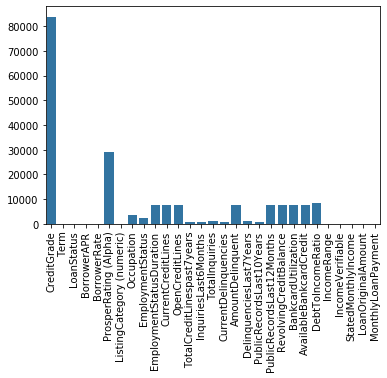

In [1083]:
na_counts = df_clean.isna().sum()
base_color = sns.color_palette()[0]
sns.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90);

19 variables out of 30 are missing values and Credit Grade and ProsperRating (Alpha) have the highest counts.

I will start treating the missing values by filling the data where possible. Such variables are Credit Grade and ProsperRating (Alpha),and BorrowerAPR beginning with Credit Grade and ProsperRating (Alpha). 

##### Missing values in Prosper Rating (Alpha) and CreditGrade

In [1084]:
#Checking the unique values under ProsperRating (Alpha)
df_clean['ProsperRating (Alpha)'].unique()

array(['B', 'AA', 'E', 'HR', 'D', 'C', 'A', nan], dtype=object)

In [1085]:
#Checking the unique values under CreditGrade
df_clean['CreditGrade'].unique()

array([nan, 'NC', 'A', 'AA', 'D', 'E', 'C', 'B', 'HR'], dtype=object)

As the Prosper Rating (Alpha) and CreditScore are basically the same rating, Prosper Rating just being inhouse rating that took place in 2009, lets first put these two columns together and then after combining these look again at the missing values.

In [1086]:
# Combining the values from two columns (CreditGrade and ProsperRating (Alpha) in one column called RatingCombined
df_clean['RatingCombined'] = df_clean['CreditGrade'].fillna('') + df_clean['ProsperRating (Alpha)'].fillna('')

In [1087]:
#Counting the missing values after combining the columns
df_clean.RatingCombined.isnull().sum() # the result is zero, so there are no more missing values in the column"

0

In [1088]:
# Checking the number of different values in the new column
df_clean.RatingCombined.value_counts() # There are still 131 values that have no category, and 141 are not confirmed (NC). 

C     23671
B     19705
D     19259
A     17648
E     12972
HR    10392
AA     8807
NC      141
        131
Name: RatingCombined, dtype: int64

In [1089]:
# Creating a list of ratings we want to use for the ordered category from best on the left to worst on the right
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

# Converting RatingCombined into ordered categorical type
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = rating_order)
df_clean['RatingCombined'] = df_clean['RatingCombined'].astype(ordered_cat)

# Storing only the rows that have a valid rating from the above created list
df_clean = df_clean[df_clean.RatingCombined.isin(rating_order)]

In [1090]:
# Lets immediately drop the CreditGrade and ProsperRating (Alpha) as they are no longer needed
df_clean = df_clean.drop(columns=['CreditGrade', 'ProsperRating (Alpha)'])

In [1091]:
# Confirming that the 2 columns have been dropped
df_clean.shape

(112454, 28)

##### Borrower APR

Now we try to fill the missing values from the BorrowerAPR by calculating the BorrowerAPR with formula (APR = BorrowerRate + origination fee).

In [1092]:
# Determining the most common origination fee in the dataset
origination_fee = df_clean['BorrowerAPR'] - df_clean['BorrowerRate']
origination_fee.mean()

0.02603242542025914

In [1093]:
#Then we fill the missing BorrowerAPR values by adding the average origination fee to the BorrowerRate
df_clean['BorrowerAPR'].fillna(df_clean['BorrowerRate'] + origination_fee.mean(), inplace = True)

In [1094]:
# Counting the sum of the rows that have null value after the fill
df_clean.BorrowerAPR.isnull().sum()
# The result is zero, which means there are no longer null values in this column

0

#### Dropping the remaining rows with missing values
I could be filling the rest of the missing values with averages of each variable, but as the counts of missing values are relatively low, I feel more comfortable in sticking with the real data and dropping the rows with missing values instead.

In [1095]:
# Dropping the missing values from the chosen columns
df_clean.dropna(subset=["Occupation", "DebtToIncomeRatio", "EmploymentStatusDuration", "EmploymentStatus", "AmountDelinquent", "AvailableBankcardCredit",
                  "BankcardUtilization", 'CurrentCreditLines', 'CurrentDelinquencies', 'DelinquenciesLast7Years', 'TotalCreditLinespast7years'], inplace=True)

In [1096]:
# Confirming results. There are no longer missing values in the dataset. 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95406 entries, 96976 to 17277
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Term                        95406 non-null  int64   
 1   LoanStatus                  95406 non-null  object  
 2   BorrowerAPR                 95406 non-null  float64 
 3   BorrowerRate                95406 non-null  float64 
 4   ListingCategory (numeric)   95406 non-null  int64   
 5   Occupation                  95406 non-null  object  
 6   EmploymentStatus            95406 non-null  object  
 7   EmploymentStatusDuration    95406 non-null  float64 
 8   CurrentCreditLines          95406 non-null  float64 
 9   OpenCreditLines             95406 non-null  float64 
 10  TotalCreditLinespast7years  95406 non-null  float64 
 11  InquiriesLast6Months        95406 non-null  float64 
 12  TotalInquiries              95406 non-null  float64 
 13  CurrentDelin

#### Changing the object datatypes to category 

In [1097]:
# Changing all object datatypes to category at once
df_clean[df_clean.select_dtypes(['object']).columns] = df_clean.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [1098]:
# Confirming results that the Object datatypes have been changed to category and that the missing values in 
#Employment Status. 
df_clean.info()# The changes have taken place OK

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95406 entries, 96976 to 17277
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Term                        95406 non-null  int64   
 1   LoanStatus                  95406 non-null  category
 2   BorrowerAPR                 95406 non-null  float64 
 3   BorrowerRate                95406 non-null  float64 
 4   ListingCategory (numeric)   95406 non-null  int64   
 5   Occupation                  95406 non-null  category
 6   EmploymentStatus            95406 non-null  category
 7   EmploymentStatusDuration    95406 non-null  float64 
 8   CurrentCreditLines          95406 non-null  float64 
 9   OpenCreditLines             95406 non-null  float64 
 10  TotalCreditLinespast7years  95406 non-null  float64 
 11  InquiriesLast6Months        95406 non-null  float64 
 12  TotalInquiries              95406 non-null  float64 
 13  CurrentDelin

#### Changing ListingCategory (numeric) from integer to category, and changing the numeric category identifiers to their corresponding names
The definitions are:
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [1099]:
# First lets change the column name to ListingCategory instead
df_clean.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True) 

In [1100]:
# Changing the datatype to category
df_clean['ListingCategory'] = df_clean['ListingCategory'].astype('category')

In [1101]:
#Creating a dictionary with the category names and using map to apply the corresponding values to the column
# I chose to use map because it is faster than replace and the notebook crashes when replace is used. 
dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans' }
df_clean['ListingCategory'] = df_clean['ListingCategory'].map(dict)

Source: [Stackoverflow](https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict)

In [1102]:
# confirming the results by checking the listing category values 
df_clean['ListingCategory'].value_counts()

Debt Consolidation    52709
Other                  9342
Not Available          9128
Home Improvement       6843
Business               5144
Auto                   2334
Personal Loan          2267
Household Expenses     1754
Medical/Dental         1366
Large Purchases         781
Taxes                   780
Wedding Loans           719
Vacation                709
Student Use             599
Motorcycle              289
Engagement Ring         198
Baby&Adoption           187
Boat                     82
Cosmetic Procedure       82
RV                       49
Green Loans              44
Name: ListingCategory, dtype: int64

Now our data is cleaned and ready for exploration, at least for now. We will continue to exploring the dataset with univariate methods investigating distributions of individual variables.

## Univariate Exploration

In this section I will explore the loan status variable and some variables in the unmbrella groups and see if we can see any interesting features there. Lets start the exploration by looking into the variable of main interest, LoanStatus.

#### Loan Status

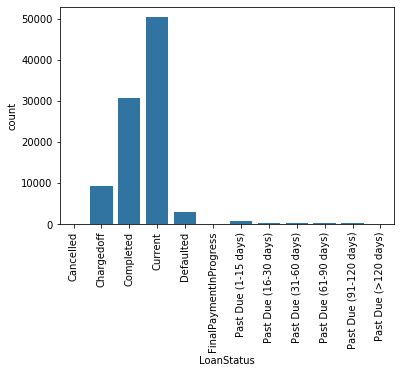

In [1103]:
# Plotting the LoanStatus
base_color = sns.color_palette()[0]
sns.countplot(data = df_clean, x = 'LoanStatus', color = base_color)
plt.xticks(rotation = 90);

The LoanStatus has 12 different statuses; Current, Completed, ChargedOff, Defaulted, Past due (1-15 days), Past due (16-30 days), Past due (31-60 days), Past due (61-90 days), Past due (91-120 days), Past due (>120 days), FinalPaymentInProgress, and Cancelled. For the purpose of this exploration, we are only interested of the statuses Completed, ChargedOff and Default because the rest of the loans statuses are still ongoing, and we do not know what final outcome will be. The loan status Cancelled, refers to a listing where funds were never granted. As credits for these loans were never pulled, we will exclude these from the data as well.  

This will cut the data more or less to half, but we will still have relatively big set of data for the exploration and analysis.

We will store the completed loans under value 1 and defaulted and charged off loans under value 0. For easier communication, we call the group of defaulted and charged off loans as defaulted. 

In [1104]:
# Checking the different loan statuses again
df_clean.LoanStatus.value_counts()

Current                   50317
Completed                 30622
Chargedoff                 9397
Defaulted                  3058
Past Due (1-15 days)        703
Past Due (31-60 days)       320
Past Due (91-120 days)      275
Past Due (61-90 days)       274
Past Due (16-30 days)       240
FinalPaymentInProgress      185
Past Due (>120 days)         14
Cancelled                     1
Name: LoanStatus, dtype: int64

In [1105]:
# Storing only the loan listings that have status 'completed', 'chargedoff' or 'defaulted' under variable df_grouped
df_grouped = df_clean[(df_clean.LoanStatus  == 'Completed')|(df_clean.LoanStatus  == 'Chargedoff') | (df_clean.LoanStatus  == 'Defaulted')]

In [1106]:
# Converting boolean mask to integer - Trues to 1 and Falses to 0:
df_grouped.LoanStatus = (df_grouped.LoanStatus == 'Completed').astype(int)

C:\Users\Terhi\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Source: [Stackoverflow](https://stackoverflow.com/questions/49857470/replace-value-in-pandas-dataframe-based-on-condition)

In [1107]:
# Confirming the results
df_grouped.LoanStatus.value_counts()

1    30622
0    12455
Name: LoanStatus, dtype: int64

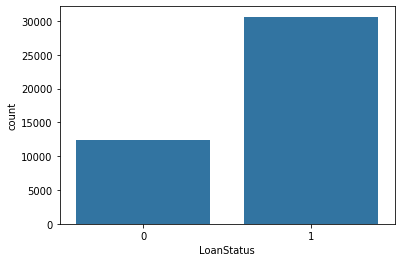

In [1108]:
# Plotting the loan statuses in df_grouped
base_color = sns.color_palette()[0]
sns.countplot(data = df_grouped, x = 'LoanStatus', color = base_color);

In [1109]:
# Getting the percentage of completed and defaulted loans in the subset. 
df_grouped.LoanStatus.mean(), 1-df_grouped.LoanStatus.mean()

(0.7108665877382362, 0.2891334122617638)

Around 71% of the loans are completed and 29% are defaulted in the subset.

I am curious what is the pure default rate in the whole dataset before grouping the completed and charged off and default loans. Default rate is the percentage of all outstanding loans that a lender has written off after a prolonged period of missed payments (typically if payment is 270 days late). It is an important measurement used by lenders to determine their exposure to risk. Source: [Investopedia](https://www.investopedia.com/terms/d/defaultrate.asp)

In [1110]:
# Creating a variable with only loans with status 'Defaulted'
defaulted_loans = df_clean.loc[(df_clean['LoanStatus']== "Defaulted")]

In [1111]:
len(defaulted_loans) / len(df_clean)

0.03205249145756032

The 3.1% rate of defaulted loans seems rather high. As a comparison the S&P/Experian Consumer Credit Default Composite Index (includes data on both first and second mortgages, auto loans, and bank credit cards) reported as of January 2020, a default rate of 1.02%. Even bank credit cards that tend to have the highest default rate the default rate on credit cards was 3.28%, as of January 2020, which is reflected in the S&P/Experian Bankcard Default Index. Source: [Investopedia](https://www.investopedia.com/terms/d/defaultrate.asp)

I will further check the charge-off rate which is the percentage of defaulted and charged off loans together.

In [1112]:
# Creating a variable with only loans with status 'Defaulted' and 'ChargedOff'
failed_loans = df_clean.loc[(df_clean['LoanStatus']== "Defaulted") | (df_clean['LoanStatus']== "Chargedoff")]

In [1113]:
# Calculating the proportion of all failed loans in the dataset
len(failed_loans) / len(df_clean)

0.13054734503071086

The charge-off rate as of first quarter of 2020 for credit card loans from all commercial banks was 3.76%, and the percentage of failed loans in the dataset is 13%, which indicates to me that Prosper is accepting risky loans. Source: [Investopedia](https://www.investopedia.com/terms/c/chargeoff-rate-credit-card.asp)

Lets continue by exploring the basic statistics of the loan status subset to see if we can indentify some issues or interesting features we need to look into.  

In [1114]:
# Getting the summary statistics of df_grouped
df_grouped.describe()

Term    LoanStatus   BorrowerAPR  BorrowerRate  \
count  43077.000000  43077.000000  43077.000000  43077.000000   
mean      37.107041      0.710867      0.222118      0.199011   
std        7.828614      0.453365      0.089460      0.082358   
min       12.000000      0.000000      0.006530      0.000000   
25%       36.000000      0.000000      0.147090      0.130000   
50%       36.000000      1.000000      0.212230      0.190000   
75%       36.000000      1.000000      0.295370      0.268400   
max       60.000000      1.000000      0.423950      0.360000   

       EmploymentStatusDuration  CurrentCreditLines  OpenCreditLines  \
count              43077.000000        43077.000000     43077.000000   
mean                  82.275646            9.673585         8.415372   
std                   84.857070            5.591989         4.990256   
min                    0.000000            0.000000         0.000000   
25%                   22.000000            6.000000         5.000000   
50%                   54.000000            9.000000         8.000000   
75%                  114.000000           13.000000        11.000000   
max                  755.000000           59.000000        51.000000   

       TotalCreditLinespast7years  InquiriesLast6Months  TotalInquiries  ...  \
count                43077.000000          43077.000000    43077.000000  ...   
mean                    26.033475              1.879054        6.817652  ...   
std                     14.324567              2.820956        7.396719  ...   
min                      2.000000              0.000000        0.000000  ...   
25%                     15.000000              0.000000        2.000000  ...   
50%                     24.000000              1.000000        5.000000  ...   
75%                     34.000000              2.000000        9.000000  ...   
max                    136.000000             63.000000      158.000000  ...   

       DelinquenciesLast7Years  PublicRecordsLast10Years  \
count             43077.000000              43077.000000   
mean                  4.261276                  0.318523   
std                  10.160172                  0.752785   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   3.000000                  0.000000   
max                  99.000000                 30.000000   

       PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  \
count               43077.000000            4.307700e+04         43077.000000   
mean                    0.024421            1.552006e+04             0.536267   
std                     0.183743            3.339823e+04             0.351343   
min                     0.000000            0.000000e+00             0.000000   
25%                     0.000000            1.642000e+03             0.220000   
50%                     0.000000            6.114000e+03             0.570000   
75%                     0.000000            1.615400e+04             0.850000   
max                     7.000000            1.435667e+06             5.950000   

       AvailableBankcardCredit  DebtToIncomeRatio  StatedMonthlyIncome  \
count             43077.000000       43077.000000         43077.000000   
mean              10610.140237           0.292798          5223.983336   
std               21369.114422           0.721409          5012.291564   
min                   0.000000           0.000000             0.000000   
25%                 494.000000           0.130000          2990.000000   
50%                3135.000000           0.210000          4333.333333   
75%               11746.000000           0.310000          6343.000000   
max              572427.000000          10.010000        483333.333300   

       LoanOriginalAmount  MonthlyLoanPayment  
count        43077.000000        43077.000000  
mean          6517.342944

First, I immediately see that Borrower APR and Borrower Rate have some unusually low minimum values, 0.006530 and 0 respectively. 

Second, the Debt-To-Income Ratio (DTI) has 10.01 as max value and 0 as a min value, these are both unusual figures, however, the Stated montly income minimum value 0 explains the zero values in the DTI min, so lets just look into the extreme values at 10. 

Thirdly, the stated montly income max value in 483333.33 which is extremely high for a monthly income. 

And finally, the monthly loan payment has minimum value 0, which is not logical at all. 

Next, lets investigate further these distributions and their outliers and see if they should be filtered from our data. 

#### Debt-To-Income Ratio (DTI)

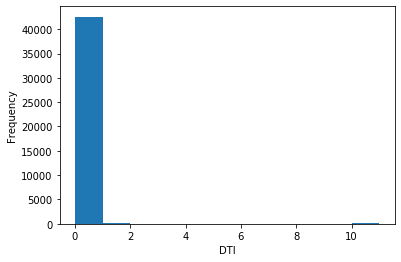

In [1115]:
# Plotting the DTI 
bin_edges = np.arange(0, df_grouped['DebtToIncomeRatio'].max()+1, 1)
plt.hist(data = df_grouped, x = 'DebtToIncomeRatio', bins = bin_edges)
plt.xlabel('DTI')
plt.ylabel('Frequency');


Most of the DTIs for the loans in the df_grouped are between 0 and 1 as expected and as there are some outliers at between 2 and 11 we can not see the distribution of the values between 0 and 1. Lets therefore first set the upper xlim to 1 and look again at the distribution.

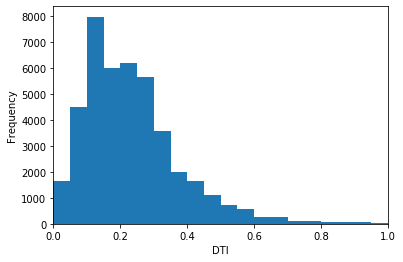

In [1116]:
# Re-plotting the DTI with xlim

bin_edges = np.arange(0, 1+1/20,1/20)
plt.hist(data = df_grouped, x = 'DebtToIncomeRatio', bins = bin_edges)
plt.xlim(0,1) # setting xlim lower limit to 0 and upper limit to 1
plt.xlabel('DTI')
plt.ylabel('Frequency');

Changing the upper limit turns out to be very illuminating. We can now see that the distribution has the highest peak at around DTI of 0.1, and very high frequency between 0.1 and 0.3, curving to 0.4 and then tailing slowly to until 0.8 and 1.0 to the left. As lenders typically seek ratios of no more than 36% and a DTI of 43% is generally the highest ratio a borrower can have to get qualified for a mortgage, the frequency between 0.1 and 0.4 seems quite normal. As Prosper is not a typical financial institution, and lenders are investors, higher DTI rates up to 1 are also expected.

Lets however look closer at the listings with more extreme DTI ratios, listings that have DTI of 0 and above 1. 

In [1117]:
# pulling DTIs with value 0 from the dataset and saving them under variable lower_outliers.
lower_outliers = df_grouped.query('DebtToIncomeRatio == 0')
print(len(lower_outliers))
lower_outliers.head()

8


Term  LoanStatus  BorrowerAPR  BorrowerRate     ListingCategory  \
97784    36           0      0.22135        0.1990    Home Improvement   
59329    36           1      0.16147        0.1399               Other   
78431    36           0      0.20253        0.1952       Not Available   
17411    36           1      0.35643        0.3199  Debt Consolidation   
11312    36           1      0.08684        0.0800       Not Available   

         Occupation EmploymentStatus  EmploymentStatusDuration  \
97784         Other        Full-time                     112.0   
59329  Professional         Employed                      70.0   
78431     Executive        Full-time                      10.0   
17411  Professional         Employed                     121.0   
11312       Realtor        Full-time                     104.0   

       CurrentCreditLines  OpenCreditLines  ...  RevolvingCreditBalance  \
97784                 1.0              1.0  ...                   581.0   
59329                 3.0              3.0  ...                     9.0   
78431                 2.0              2.0  ...                   632.0   
17411                 8.0              7.0  ...                 12990.0   
11312                 4.0              2.0  ...                 11426.0   

       BankcardUtilization  AvailableBankcardCredit  DebtToIncomeRatio  \
97784                 0.58                    419.0                0.0   
59329                 0.01                    491.0                0.0   
78431                 0.79                    168.0                0.0   
17411                 0.86                   2114.0                0.0   
11312                 0.24                  36074.0                0.0   

         IncomeRange  IncomeVerifiable  StatedMonthlyIncome  \
97784      $100,000+              True          45833.33333   
59329      $100,000+              True          28333.33333   
78431      $100,000+              True         103334.08330   
17411      $100,000+              True         483333.33330   
11312  Not displayed              True          75000.00000   

       LoanOriginalAmount  MonthlyLoanPayment  RatingCombined  
97784                3500              129.89               C  
59329                2000               68.35               B  
78431                5000              184.60               C  
17411                7500              326.62               E  
11312                3000               94.01              AA  

[5 rows x 28 columns]

There are 8 DTI with value zero in the data. As debt-to-income ratio is all monthly debt payments divided by the gross monthly income, in order to have zero DTI, the borrower can not have any open credit lines at the moment when the credit is pulled. Therefore, lets test if our borrowers with zero DTI for open credit lines. 

In [1118]:
# Checking for low_outliers with zero open credit lines
lower_outliers.query('OpenCreditLines == 0.0')

Empty DataFrame
Columns: [Term, LoanStatus, BorrowerAPR, BorrowerRate, ListingCategory, Occupation, EmploymentStatus, EmploymentStatusDuration, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanOriginalAmount, MonthlyLoanPayment, RatingCombined]
Index: []

[0 rows x 28 columns]

In [1119]:
# Lets do the same for CurrentCreditLines
lower_outliers.query('CurrentCreditLines == 0.0')

Empty DataFrame
Columns: [Term, LoanStatus, BorrowerAPR, BorrowerRate, ListingCategory, Occupation, EmploymentStatus, EmploymentStatusDuration, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanOriginalAmount, MonthlyLoanPayment, RatingCombined]
Index: []

[0 rows x 28 columns]

It seems that all of the borrowers that have 0 DTI have creditlines open, which means that there could have been an error in the data input when processing the listing. For safety, lets remove these lower_outliers from the data, but first, I continue investigating upper outliers in the data. 

In [1120]:
# select upper extreme outliers, using criteria eyeballed from the plots
upper_outliers = df_grouped.query('DebtToIncomeRatio > 1')
upper_outliers.shape

(505, 28)

There are 505 listings that have with DebtToIncome Ratio above 1. Lets get their basic statistics to get a better picture of the data. 

In [1121]:
# Getting the basic statistics for the upper outliers
upper_outliers.describe()

Term  LoanStatus  BorrowerAPR  BorrowerRate  \
count  505.000000  505.000000   505.000000    505.000000   
mean    36.665347    0.554455     0.233053      0.214418   
std      5.410242    0.497519     0.086544      0.078155   
min     12.000000    0.000000     0.013250      0.000100   
25%     36.000000    0.000000     0.160560      0.150000   
50%     36.000000    1.000000     0.225230      0.210000   
75%     36.000000    1.000000     0.305320      0.290000   
max     60.000000    1.000000     0.413550      0.350000   

       EmploymentStatusDuration  CurrentCreditLines  OpenCreditLines  \
count                505.000000          505.000000       505.000000   
mean                  66.710891           10.625743         9.336634   
std                   81.780749            6.291255         5.675548   
min                    0.000000            0.000000         0.000000   
25%                   12.000000            6.000000         5.000000   
50%                   37.000000           10.000000         8.000000   
75%                   90.000000           14.000000        13.000000   
max                  484.000000           34.000000        32.000000   

       TotalCreditLinespast7years  InquiriesLast6Months  TotalInquiries  ...  \
count                  505.000000            505.000000      505.000000  ...   
mean                    25.629703              2.388119        7.813861  ...   
std                     15.149110              3.601127        9.966064  ...   
min                      2.000000              0.000000        0.000000  ...   
25%                     14.000000              0.000000        2.000000  ...   
50%                     23.000000              1.000000        5.000000  ...   
75%                     34.000000              3.000000       10.000000  ...   
max                    101.000000             29.000000      112.000000  ...   

       DelinquenciesLast7Years  PublicRecordsLast10Years  \
count               505.000000                505.000000   
mean                  2.843564                  0.213861   
std                   8.925468                  0.539883   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   1.000000                  0.000000   
max                  99.000000                  4.000000   

       PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  \
count                 505.000000              505.000000           505.000000   
mean                    0.015842            21368.879208             0.540158   
std                     0.153486            41404.491478             0.347295   
min                     0.000000                0.000000             0.000000   
25%                     0.000000             1866.000000             0.220000   
50%                     0.000000             7566.000000             0.570000   
75%                     0.000000            24900.000000             0.870000   
max                     2.000000           600223.000000             1.220000   

       AvailableBankcardCredit  DebtToIncomeRatio  StatedMonthlyIncome  \
count               505.000000         505.000000           505.000000   
mean              10539.613861           5.419010           817.277888   
std               17293.771478           4.011238          1539.257689   
min                   0.000000           1.010000             0.000000   
25%                 914.000000           1.410000             0.083333   
50%                3823.000000           3.730000           206.500000   
75%               12441.000000          10.010000          1066.666667   
max              167632.000000          10.010000         17083.333330   

       LoanOriginalAmount  MonthlyLoanPayment  
count          505.000000          505.000000  
mean          7052.849505          258.375584  
std           6240.1

In [1122]:
#Taking a sample of 10 from the upper_outliers to get an overview of the data
upper_outliers.sample(10)

Term  LoanStatus  BorrowerAPR  BorrowerRate     ListingCategory  \
24811     36           0      0.27535        0.2600       Not Available   
49741     36           1      0.16105        0.1539       Not Available   
28574     36           1      0.32576        0.2899  Debt Consolidation   
8829      36           1      0.25757        0.2500       Not Available   
48098     36           1      0.12951        0.1225       Not Available   
56897     36           0      0.19991        0.1926       Not Available   
76963     36           0      0.16215        0.1550       Not Available   
55450     36           0      0.37423        0.3497            Business   
46841     36           1      0.16978        0.1626       Not Available   
107536    36           1      0.29776        0.2900       Not Available   

                                Occupation EmploymentStatus  \
24811                   Sales - Commission        Full-time   
49741   Student - College Graduate Student     Not employed   
28574             Administrative Assistant        Part-time   
8829                             Executive    Self-employed   
48098             Student - College Senior    Self-employed   
56897                    Retail Management    Self-employed   
76963                            Executive    Self-employed   
55450                              Realtor        Full-time   
46841                                Other    Self-employed   
107536                      Accountant/CPA    Self-employed   

        EmploymentStatusDuration  CurrentCreditLines  OpenCreditLines  ...  \
24811                       30.0                 4.0              3.0  ...   
49741                        2.0                 5.0              5.0  ...   
28574                       57.0                14.0             14.0  ...   
8829                        20.0                10.0             10.0  ...   
48098                        2.0                 6.0              6.0  ...   
56897                       32.0                17.0             15.0  ...   
76963                        6.0                11.0             11.0  ...   
55450                       34.0                22.0             12.0  ...   
46841                        4.0                 9.0              9.0  ...   
107536                     328.0                18.0             16.0  ...   

        RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
24811                   4641.0                 0.72                   1759.0   
49741                    884.0                 0.43                    255.0   
28574                  23924.0                 0.46                  24933.0   
8829                   10926.0                 0.26                  30571.0   
48098                   1218.0                 0.01                  61882.0   
56897                  45529.0                 0.85                   7261.0   
76963                  30347.0                 0.97                    527.0   
55450                  14672.0                 0.77                   2776.0   
46841                  11347.0                 0.48                  10332.0   
107536                 18955.0                 0.85                   2792.0   

        DebtToIncomeRatio    IncomeRange  IncomeVerifiable  \
24811                1.45  Not displayed              True   
49741               10.01   Not employed             False   
28574                1.79      $1-24,999              True   
8829                10.01  Not displayed             False   
48098               10.01      $1-24,999              True   
56897               10.01      $1-24,999             False   
76963               10.01      $1-24,999             False   
55450                1.23      $1-24,999              True   
46841               10.01      $1-24,999              True   
107536               2.09      $1-24,999              True   

        StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayme

The minimum StatedMonthlyIncome value in the upper_outliers dataset is 0, and looking at the sample, I see these incomes do not seem to have been verified. Lets see if there is a pattern here. 

In [1123]:
income_not_verified = upper_outliers.query('StatedMonthlyIncome < 1 & IncomeVerifiable == False')
income_not_verified.head()

Term  LoanStatus  BorrowerAPR  BorrowerRate ListingCategory  \
91156     36           1      0.14636        0.1375   Not Available   
90975     36           1      0.16115        0.1540   Not Available   
112308    36           1      0.16516        0.1580   Not Available   
71122     36           0      0.30564        0.2900   Not Available   
48743     36           0      0.15893        0.1500   Not Available   

                                Occupation EmploymentStatus  \
91156   Student - College Graduate Student        Full-time   
90975                                Other     Not employed   
112308                  Sales - Commission    Self-employed   
71122                                Other    Self-employed   
48743                                Other        Part-time   

        EmploymentStatusDuration  CurrentCreditLines  OpenCreditLines  ...  \
91156                       20.0                 6.0              6.0  ...   
90975                        0.0                23.0             17.0  ...   
112308                       8.0                 4.0              4.0  ...   
71122                       77.0                14.0             11.0  ...   
48743                        1.0                 5.0              5.0  ...   

        RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
91156                   4202.0                 0.82                    600.0   
90975                  32593.0                 0.90                   3036.0   
112308                  1400.0                 0.00                   1500.0   
71122                   7290.0                 0.54                   6134.0   
48743                      0.0                 0.00                  13500.0   

        DebtToIncomeRatio   IncomeRange  IncomeVerifiable  \
91156               10.01     $1-24,999             False   
90975               10.01  Not employed             False   
112308              10.01     $1-24,999             False   
71122               10.01     $1-24,999             False   
48743               10.01     $1-24,999             False   

        StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  \
91156              0.083333                2000               68.11   
90975              0.083333               13995                0.00   
112308             0.083333                6001              210.39   
71122              0.083333               15400              645.35   
48743              0.083333                2000               69.33   

        RatingCombined  
91156                C  
90975                C  
112308               A  
71122               HR  
48743                A  

[5 rows x 28 columns]

In [1124]:
print(income_not_verified.StatedMonthlyIncome.value_counts())
print(len(income_not_verified))

0.083333    150
0.000000      1
Name: StatedMonthlyIncome, dtype: int64
151


There are 151 unverified incomes under 1 Dollar, and 150 of them are USD 0.083333 USD, and 1 has value of USD 0. The 0.83333 could be somekind of Prosper system default value, but in any case as these incomes are not verified, I think we can safely drop these listings from the data. Instead of just dropping the unverified incomes within the outliers, lets drop rather drop them all. Lets however first continue looking into all the incomes that are verified in the upper_outliers and then delete all necessary data together.

In [1125]:
# Filtering the upper_outliers with only verified incomes and storing then under income_verifiable
income_verifiable = upper_outliers.query('IncomeVerifiable == True')
# Getting the number of rows in income_verifiable
print(len(income_verifiable))
# Displaying a sample of 10
income_verifiable.sample(10)

354


Term  LoanStatus  BorrowerAPR  BorrowerRate     ListingCategory  \
39322     36           0      0.19645        0.1599    Home Improvement   
100853    36           0      0.29776        0.2900       Not Available   
37369     36           1      0.13594        0.1289       Not Available   
70106     36           1      0.16005        0.1385  Debt Consolidation   
39458     36           1      0.19730        0.1900       Not Available   
46841     36           1      0.16978        0.1626       Not Available   
15624     36           1      0.41355        0.3500               Other   
100338    36           1      0.14887        0.1400       Not Available   
40990     36           0      0.37453        0.3500       Personal Loan   
88820     36           0      0.33973        0.2999  Debt Consolidation   

                      Occupation EmploymentStatus  EmploymentStatusDuration  \
39322                      Other            Other                     102.0   
100853                     Other        Full-time                      83.0   
37369                      Other    Self-employed                      85.0   
70106                   Clerical        Part-time                      28.0   
39458                   Clerical        Full-time                     141.0   
46841                      Other    Self-employed                       4.0   
15624                    Teacher         Employed                       2.0   
100338                     Other          Retired                     438.0   
40990   Administrative Assistant        Full-time                     103.0   
88820   Administrative Assistant         Employed                      41.0   

        CurrentCreditLines  OpenCreditLines  ...  RevolvingCreditBalance  \
39322                 12.0              7.0  ...                  3330.0   
100853                16.0             13.0  ...                 49055.0   
37369                 15.0             15.0  ...                 28760.0   
70106                 18.0             18.0  ...                 16760.0   
39458                 23.0             22.0  ...                 51897.0   
46841                  9.0              9.0  ...                 11347.0   
15624                  2.0              2.0  ...                  5119.0   
100338                10.0              8.0  ...                  7566.0   
40990                 16.0             15.0  ...                 20372.0   
88820                 16.0             14.0  ...                  2626.0   

        BankcardUtilization  AvailableBankcardCredit  DebtToIncomeRatio  \
39322                  0.39                   5170.0               1.07   
100853                 0.87                   7105.0               7.99   
37369                  0.77                   7498.0               1.39   
70106                  0.82                   2996.0               1.61   
39458                  0.64                  24469.0               1.58   
46841                  0.48                  10332.0              10.01   
15624                  0.86                    781.0               2.20   
100338                 0.20                  10877.0               3.92   
40990                  0.71                   6132.0               1.05   
88820                  0.21                   8890.0               5.05   

           IncomeRange  IncomeVerifiable  StatedMonthlyIncome  \
39322        $1-24,999              True          1500.000000   
100853       $1-24,999              True          3658.333333   
37369        $1-24,999              True           833.333333   
70106        $1-24,999              True          1646.833333   
39458        $1-24,999              True          2000.000000   
46841        $1-24,999              True             0.083333   
15624   $50,000-74,999              True          4833.333333   
100338       $1-24,999              True           196.333333   
40990        $1-24,999              True          1833.333333   

In [1126]:
# Getting the basic statistics for income_veribiable
income_verifiable.describe()

Term  LoanStatus  BorrowerAPR  BorrowerRate  \
count  354.000000  354.000000   354.000000    354.000000   
mean    36.949153    0.581921     0.250013      0.227508   
std      6.443717    0.493941     0.088997      0.079771   
min     12.000000    0.000000     0.013250      0.000100   
25%     36.000000    0.000000     0.175713      0.162625   
50%     36.000000    1.000000     0.249900      0.230000   
75%     36.000000    1.000000     0.348480      0.309900   
max     60.000000    1.000000     0.413550      0.350000   

       EmploymentStatusDuration  CurrentCreditLines  OpenCreditLines  \
count                354.000000          354.000000       354.000000   
mean                  74.358757           10.889831         9.564972   
std                   89.673620            6.418083         5.832653   
min                    0.000000            1.000000         1.000000   
25%                   13.000000            6.000000         5.250000   
50%                   42.000000           10.000000         8.000000   
75%                  103.000000           14.000000        13.000000   
max                  484.000000           34.000000        32.000000   

       TotalCreditLinespast7years  InquiriesLast6Months  TotalInquiries  ...  \
count                  354.000000            354.000000      354.000000  ...   
mean                    27.101695              1.957627        6.562147  ...   
std                     15.304866              3.294069        8.163543  ...   
min                      2.000000              0.000000        0.000000  ...   
25%                     15.000000              0.000000        2.000000  ...   
50%                     25.000000              1.000000        4.000000  ...   
75%                     36.000000              2.750000        8.000000  ...   
max                     84.000000             29.000000       74.000000  ...   

       DelinquenciesLast7Years  PublicRecordsLast10Years  \
count               354.000000                354.000000   
mean                  3.186441                  0.234463   
std                   9.403106                  0.572108   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   1.000000                  0.000000   
max                  99.000000                  4.000000   

       PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  \
count                 354.000000              354.000000           354.000000   
mean                    0.014124            20440.768362             0.556808   
std                     0.140107            42116.730412             0.340049   
min                     0.000000                0.000000             0.000000   
25%                     0.000000             2033.000000             0.260000   
50%                     0.000000             8193.000000             0.570000   
75%                     0.000000            23972.750000             0.870000   
max                     2.000000           600223.000000             1.220000   

       AvailableBankcardCredit  DebtToIncomeRatio  StatedMonthlyIncome  \
count               354.000000         354.000000           354.000000   
mean               9746.556497           3.460706          1165.855461   
std               14901.267745           3.179763          1724.906822   
min                   0.000000           1.010000             0.083333   
25%                1050.250000           1.220000           166.666667   
50%                3498.000000           1.810000           603.291667   
75%               11044.250000           4.672500          1498.875000   
max               98104.000000          10.010000         17083.333330   

       LoanOriginalAmount  MonthlyLoanPayment  
count          354.000000          354.000000  
mean          6409.005650          236.621949  
std           5593.1

In [1127]:
# Counting the number of verified incomes that have value less than 1
len(income_verifiable.query('StatedMonthlyIncome < 1'))

19

In [1128]:
# Checking the number of employment statuses for verifiable income under 1 dollar
income_verifiable.query('StatedMonthlyIncome < 1').EmploymentStatus.value_counts()

Self-employed    13
Full-time         5
Part-time         1
Retired           0
Other             0
Not employed      0
Employed          0
Name: EmploymentStatus, dtype: int64

In [1129]:
# Checking the number of employment statuses for verifiable income under 1000 dollars
income_verifiable.query('StatedMonthlyIncome < 1000').EmploymentStatus.value_counts()

Employed         57
Full-time        53
Part-time        42
Self-employed    34
Other            13
Retired          11
Not employed      6
Name: EmploymentStatus, dtype: int64

For the listings where borrowers verified income is above 1, I can not see any clear irregularities. The borrowers have revolving credits that can increase the DTI ratio. 

There are still 19 verified StatedMonthlyIncomes that are under 1. What could explain the unusually low registered incomes in the dataset is the employment status, where 72 of the below incomes of them are self-employed, 24 are not employed, 5 are retired. In any case, I can not find any good reason to drop these out of the data. What is do find strange though, is that the BorrowerRates and BorrowerAPRs for these are extremely low considering the borrower's income is close to zero. Lets therefore look at BorrowerRates and BorrowerAPRs next, but before doing so, we drop the listings with unverifiable income and listings where DTI is zero. 

In [1130]:
# Storing the listings with DTI 0 under variable dti_zero
dti_zero = (df_grouped['DebtToIncomeRatio'] == 0.0)
# removing the listings with DTI 0
df_grouped = df_grouped.loc[-dti_zero,:]

In [1131]:
# Confirming results
len(df_grouped.query('DebtToIncomeRatio == 0.0'))

0

In [1132]:
# before dropping the rows with unverified incomes, lets confirm the count of these in the dataset
df_grouped.IncomeVerifiable.value_counts()

True     42913
False      156
Name: IncomeVerifiable, dtype: int64

In [1133]:
# Storing the unverified incomes underChecking the upper_outliers for values that have income verifiable False 
not_verified_income = (df_grouped['IncomeVerifiable'] == False)

In [1134]:
# removing the points with unverified income
df_grouped = df_grouped.loc[-not_verified_income,:]

In [1135]:
# Confirming results
df_grouped.IncomeVerifiable.value_counts()

True    42913
Name: IncomeVerifiable, dtype: int64

#### Borrower APR

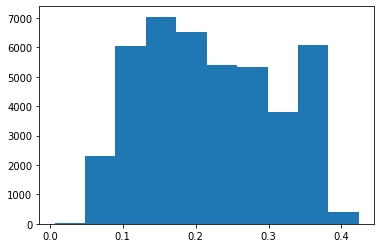

In [1136]:
# Plotting the BorrowerAPR in the dataset by their count per category
plt.hist(data = df_grouped, x = 'BorrowerAPR', color = base_color);

The distribution of borrower APRs is between a bit above 0 and 0.5. The minimum APR available at Prosper is 5.99% (as per 2020, however this is subject to change slightly), and it is available only for the highest credit rating AA. Therefore, it is worthwhile to look into the listings below 0.05 where the APR seems extremely low. Source: [Prosper](https://www.prosper.com/loans/rates-and-fees/?refac=CANMB&refmc=6YRANV&refd=prosperblog)

In [1137]:
# Checking the listings in the dataset that have APR less than 0.05. 
low_outliers = df_grouped.query('BorrowerAPR < 0.05')
print(len(low_outliers))
low_outliers.head(1)

21


Term  LoanStatus  BorrowerAPR  BorrowerRate     ListingCategory  \
50251    36           1      0.01325        0.0001  Debt Consolidation   

         Occupation EmploymentStatus  EmploymentStatusDuration  \
50251  Professional        Full-time                      12.0   

       CurrentCreditLines  OpenCreditLines  ...  RevolvingCreditBalance  \
50251                 4.0              4.0  ...                  5071.0   

       BankcardUtilization  AvailableBankcardCredit  DebtToIncomeRatio  \
50251                 0.42                   6929.0               1.16   

       IncomeRange  IncomeVerifiable  StatedMonthlyIncome  LoanOriginalAmount  \
50251    $1-24,999              True           291.666667                5000   

       MonthlyLoanPayment  RatingCombined  
50251              138.91               B  

[1 rows x 28 columns]

In [1138]:
# Counting the number of different credit ratings for low_outliers
low_outliers.RatingCombined.value_counts()

D     6
HR    4
C     4
AA    3
B     2
E     1
A     1
Name: RatingCombined, dtype: int64

In [1139]:
# Getting the statistics for the low_outliers
low_outliers.describe()

Term  LoanStatus  BorrowerAPR  BorrowerRate  \
count  21.000000   21.000000    21.000000     21.000000   
mean   33.714286    0.809524     0.026964      0.014981   
std     7.219022    0.402374     0.013222      0.015208   
min    12.000000    0.000000     0.006530      0.000000   
25%    36.000000    1.000000     0.016570      0.000100   
50%    36.000000    1.000000     0.023230      0.010000   
75%    36.000000    1.000000     0.036640      0.030000   
max    36.000000    1.000000     0.049350      0.042500   

       EmploymentStatusDuration  CurrentCreditLines  OpenCreditLines  \
count                 21.000000           21.000000        21.000000   
mean                  47.428571            6.714286         6.142857   
std                   57.139803            4.208834         3.798496   
min                    0.000000            1.000000         0.000000   
25%                    3.000000            5.000000         4.000000   
50%                   18.000000            6.000000         5.000000   
75%                   56.000000            8.000000         8.000000   
max                  190.000000           18.000000        18.000000   

       TotalCreditLinespast7years  InquiriesLast6Months  TotalInquiries  ...  \
count                   21.000000             21.000000       21.000000  ...   
mean                    17.571429              2.142857        4.952381  ...   
std                     11.707141              2.555107        4.248249  ...   
min                      5.000000              0.000000        0.000000  ...   
25%                     10.000000              0.000000        2.000000  ...   
50%                     13.000000              1.000000        4.000000  ...   
75%                     26.000000              3.000000        6.000000  ...   
max                     42.000000              9.000000       18.000000  ...   

       DelinquenciesLast7Years  PublicRecordsLast10Years  \
count                21.000000                 21.000000   
mean                  7.285714                  0.333333   
std                  14.748366                  0.730297   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   7.000000                  0.000000   
max                  63.000000                  3.000000   

       PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  \
count                       21.0               21.000000            21.000000   
mean                         0.0             7851.952381             0.413333   
std                          0.0            17559.236004             0.422283   
min                          0.0                0.000000             0.000000   
25%                          0.0              178.000000             0.020000   
50%                          0.0             1759.000000             0.420000   
75%                          0.0             5326.000000             0.730000   
max                          0.0            79709.000000             1.600000   

       AvailableBankcardCredit  DebtToIncomeRatio  StatedMonthlyIncome  \
count                21.000000          21.000000            21.000000   
mean               9902.523810           0.661905          3543.960318   
std               14867.164917           2.156169          2369.495563   
min                   0.000000           0.010000            34.583333   
25%                1741.000000           0.050000          2166.666667   
50%                3126.000000           0.120000          3000.000000   
75%                7951.000000           0.250000          4166.666667   
max               51306.000000          10.010000          9166.666667   

       LoanOriginalAmount  MonthlyLoanPayment  
count           21.000000           21.000000  
mean          3326.238095           94.147143  
std           5167.753109   

There are 21 listings with unusually low APR in the dataset. Most of these listings have credit ratings under AA, and 4 of them have the worst credit rating HR. Additionally, the BorrowerRates are for some zero, 75% are at 3% and highest rate is 4.25%, and keeping in mind that APR = BorrowerRate + origination fee, these figures do not seem right. 

Looking at the data it seems that there might have been a typing error when entering the data. To be safe, I will remove the listings that do not have credit rating of AA. 

In [1140]:
wrong_apr = ((df_grouped['BorrowerAPR'] < 0.05) & (df_grouped['RatingCombined'] != 'AA'))

In [1141]:
# removing the points with inconsistent BorrowerAPR
df_grouped = df_grouped.loc[-wrong_apr,:]

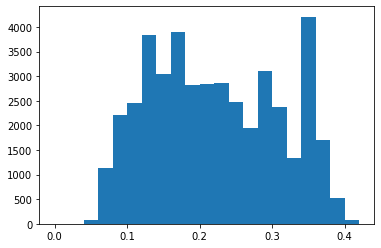

In [1142]:
# Replotting with smaller bin sizes
bin_edges = np.arange(0, df_grouped['BorrowerAPR'].max()+0.0, 0.02)
plt.hist(data = df_grouped, x = 'BorrowerAPR', bins = bin_edges);

Finally we have a distribution that after removing the outliers, the BorrowerAPR is distributed between 0.05 and 0.45. Highest density is between 0.1 and 0.2 and there are other peaks at 0.3 and 0.35, 0.35 being the highest peak of the distribution with frequency little above 4000 loans. 

Lets still check the BorrowerRate for any unusualities. 

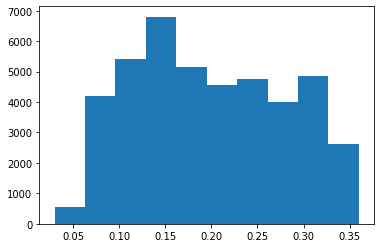

In [1143]:
# Plotting the BorrowerRate
plt.hist(data = df_grouped, x = 'BorrowerRate', color = base_color);

After the changes done with APR, there does not seem to any inconsistencies in the BorrowerRate distribution. 

#### Stated Monthly Income

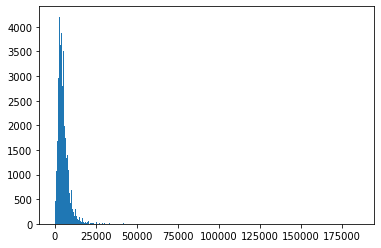

In [1144]:
# Plotting the StatedMontlyIncome
bin_edges = np.arange(0, df_grouped['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data = df_grouped, x ='StatedMonthlyIncome', bins = bin_edges);

In this plot we can clearly see that there are outliers on the right up to USD 175K. Most of the income is distributed at the left between 0 and 30K USD. In order to know if the extreme values should be filtered out of the data, lets look closer into listings with incomes above 30K USD. 

In [1145]:
# Storing the monthly incomes above 30K to variable upper_outliers_income
upper_outliers_income = df_grouped.query('StatedMonthlyIncome > 30000')
print(len(upper_outliers_income))
upper_outliers_income.sample(10)

99


Term  LoanStatus  BorrowerAPR  BorrowerRate     ListingCategory  \
10470     36           0      0.13413        0.1129  Debt Consolidation   
1304      36           1      0.20200        0.1799  Debt Consolidation   
66068     60           1      0.20358        0.1845    Home Improvement   
112211    36           1      0.16056        0.1390               Other   
44013     36           1      0.09736        0.0839  Debt Consolidation   
56431     36           1      0.06587        0.0625            Business   
1171      60           0      0.26887        0.2433  Debt Consolidation   
10259     36           0      0.20725        0.1999       Not Available   
73373     36           1      0.13562        0.1215    Home Improvement   
1137      36           1      0.35797        0.3177    Home Improvement   

          Occupation EmploymentStatus  EmploymentStatusDuration  \
10470   Professional         Employed                      71.0   
1304           Other         Employed                     109.0   
66068      Executive         Employed                     319.0   
112211  Professional         Employed                      73.0   
44013      Executive         Employed                      81.0   
56431   Professional         Employed                       3.0   
1171          Doctor         Employed                      87.0   
10259         Doctor        Full-time                     129.0   
73373      Executive        Full-time                      25.0   
1137       Executive         Employed                     139.0   

        CurrentCreditLines  OpenCreditLines  ...  RevolvingCreditBalance  \
10470                 11.0             15.0  ...                 18242.0   
1304                  11.0             11.0  ...                 12775.0   
66068                  7.0              7.0  ...                176707.0   
112211                11.0             11.0  ...                   777.0   
44013                 13.0             12.0  ...                  1869.0   
56431                  8.0              7.0  ...                 19389.0   
1171                  12.0             12.0  ...                  8223.0   
10259                 27.0             25.0  ...                278478.0   
73373                 10.0             10.0  ...                236320.0   
1137                  18.0             17.0  ...                 79235.0   

        BankcardUtilization  AvailableBankcardCredit  DebtToIncomeRatio  \
10470                  0.69                   8479.0               0.13   
1304                   0.55                  10225.0               0.07   
66068                  0.87                  24293.0               0.03   
112211                 0.02                  33373.0               0.08   
44013                  0.31                   2721.0               0.05   
56431                  0.38                  30811.0               0.04   
1171                   1.01                     95.0               0.05   
10259                  0.83                  54122.0               0.27   
73373                  0.11                  83282.0               0.04   
1137                   0.97                   1949.0               0.14   

        IncomeRange  IncomeVerifiable  StatedMonthlyIncome  \
10470     $100,000+              True          33333.33333   
1304      $100,000+              True          31250.00000   
66068     $100,000+              True          41666.66667   
112211    $100,000+              True          30416.66667   
44013     $100,000+              True          45833.33333   
56431     $100,000+              True          50000.00000   
1171      $100,000+              True          34813.25000   
10259     $100,000+              True          32024.58333   
73373     $100,000+              True          33872.16667   
1137      $100,000+              True          37500.00000   

        LoanOriginalAmount  MonthlyLoanPayment  RatingCombined  
10470                25000       

There are 99 upper outliers above 30K in the data. As we already know that all the incomes are verified, so in order to test the incomes further, lets check features that are linked to income level such as employment status and occupation. 

In [1146]:
# Checking the number of different employment statuses 
upper_outliers_income.EmploymentStatus.value_counts()

Full-time        49
Employed         44
Self-employed     6
Retired           0
Part-time         0
Other             0
Not employed      0
Name: EmploymentStatus, dtype: int64

In [1147]:
# Checking the number of different employment statuses 
upper_outliers_income.Occupation.value_counts()

Executive                             25
Professional                          21
Doctor                                13
Other                                 12
Attorney                              11
Analyst                                3
Construction                           3
Investor                               3
Computer Programmer                    2
Sales - Commission                     2
Nurse (RN)                             1
Sales - Retail                         1
Engineer - Chemical                    1
Accountant/CPA                         1
Student - College Freshman             0
Student - Community College            0
Food Service Management                0
Food Service                           0
Flight Attendant                       0
Fireman                                0
Student - Technical School             0
Engineer - Mechanical                  0
Engineer - Electrical                  0
Teacher                                0
Teacher's Aide  

All the upper borrowers within the income upper outliers are employed, (full-time, employed or self employed) and most of their occupations (82 from 99) are within the top 25 highest paid occupations in the US [Source](https://www.investopedia.com/personal-finance/top-highest-paying-jobs/), except 'other' which we dont have any further information on. Knowing however, that the incomes are verified, I can not see any evidence to remove these listings from the data.

Next, we move to look at the monthly loan payments in the dataset. 

#### Monthly Loan Payment

In [1148]:
df_grouped.MonthlyLoanPayment.describe()

count    42895.000000
mean       231.495436
std        186.462697
min          0.000000
25%        104.810000
50%        173.710000
75%        309.490000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

There are strangely zero values in the monthly loan payment variable. Lets look into these listings closer. 

In [1149]:
# Pulling the loan payments with zero value and storing them under variable zero_loan_pmnt
zero_loan_pmnt = df_grouped.query('MonthlyLoanPayment == 0')
print(len(zero_loan_pmnt))
zero_loan_pmnt.head()

748


Term  LoanStatus  BorrowerAPR  BorrowerRate     ListingCategory  \
49736     12           1      0.18526        0.1279            Vacation   
103962    36           1      0.36489        0.3405  Debt Consolidation   
59340     36           1      0.16436        0.1500       Not Available   
73624     36           1      0.11296        0.0920                Auto   
67401     12           1      0.07982        0.0704  Household Expenses   

          Occupation EmploymentStatus  EmploymentStatusDuration  \
49736   Professional         Employed                      27.0   
103962       Teacher        Full-time                      46.0   
59340          Other        Full-time                     320.0   
73624          Other        Full-time                      24.0   
67401   Professional         Employed                       7.0   

        CurrentCreditLines  OpenCreditLines  ...  RevolvingCreditBalance  \
49736                  6.0              6.0  ...                  1994.0   
103962                 7.0              5.0  ...                   575.0   
59340                  2.0              2.0  ...                     0.0   
73624                 10.0              9.0  ...                 40351.0   
67401                  9.0              8.0  ...                  1301.0   

        BankcardUtilization  AvailableBankcardCredit  DebtToIncomeRatio  \
49736                  0.79                    163.0               0.17   
103962                 0.68                    156.0               0.18   
59340                  0.00                      0.0               0.11   
73624                  0.94                   1991.0               0.37   
67401                  0.06                  17689.0               0.10   

           IncomeRange  IncomeVerifiable  StatedMonthlyIncome  \
49736   $75,000-99,999              True          6250.000000   
103962  $25,000-49,999              True          3291.666667   
59340   $50,000-74,999              True          5000.000000   
73624   $50,000-74,999              True          5416.666667   
67401   $75,000-99,999              True          7916.666667   

        LoanOriginalAmount  MonthlyLoanPayment  RatingCombined  
49736                 6000                 0.0               B  
103962                3000                 0.0               E  
59340                 2000                 0.0              HR  
73624                 2000                 0.0               A  
67401                 8000                 0.0              AA  

[5 rows x 28 columns]

All of the pieces to calculate loan repayment are available, so there must have been an error in the data entry from Prosper's side. Lets fill these values using the the monthly payment formula A = P(((1+r)^n)/((1+r)^n-1)) 

where<br>
A = payment Amount per period<br>
P = initial Principal (loan amount)<br>
r = interest rate per period<br>
n = total number of payments or periods<br>

[Source](https://www.vertex42.com/ExcelArticles/amortization-calculation.html) 


In [1150]:
# Creating the variables required for the equation
principal = df_grouped['LoanOriginalAmount']
interest = df_grouped['BorrowerRate']/12
payment_period = df_grouped['Term']

In [1151]:
# Storing the equations partially under variables a and b
a = interest*(1+interest)**payment_period
b = (1+interest)**payment_period-1

In [1152]:
# Replacing the zero values with the calculation
df_grouped['MonthlyLoanPayment'].replace(0, principal *(a/b), inplace = True)

In [1153]:
# Confirming results
len(df_grouped.query('MonthlyLoanPayment == 0')) # There are no longer zero value loan payments

0

In [1154]:
df_grouped.head()

Term  LoanStatus  BorrowerAPR  BorrowerRate   ListingCategory  \
78365    36           1      0.35643        0.3199             Other   
66515    36           1      0.30349        0.2800             Other   
27591    36           1      0.35797        0.3177  Home Improvement   
74120    36           1      0.27285        0.2346  Home Improvement   
73392    36           0      0.35797        0.3177             Other   

      Occupation EmploymentStatus  EmploymentStatusDuration  \
78365      Other            Other                     538.0   
66515      Other        Full-time                      30.0   
27591    Teacher         Employed                       7.0   
74120      Other         Employed                     219.0   
73392      Other         Employed                      59.0   

       CurrentCreditLines  OpenCreditLines  ...  RevolvingCreditBalance  \
78365                16.0             15.0  ...                 57516.0   
66515                 2.0              2.0  ...                   209.0   
27591                11.0             10.0  ...                  9952.0   
74120                26.0             20.0  ...                  7882.0   
73392                19.0             18.0  ...                 27309.0   

       BankcardUtilization  AvailableBankcardCredit  DebtToIncomeRatio  \
78365                 0.63                  32866.0               0.20   
66515                 0.04                   4321.0               0.09   
27591                 0.04                  48848.0               0.52   
74120                 0.63                   3599.0               0.42   
73392                 0.93                   1183.0               0.18   

          IncomeRange  IncomeVerifiable  StatedMonthlyIncome  \
78365       $100,000+              True         10000.000000   
66515  $25,000-49,999              True          2550.833333   
27591  $25,000-49,999              True          3541.666667   
74120  $75,000-99,999              True          6916.666667   
73392       $100,000+              True         10000.000000   

       LoanOriginalAmount  MonthlyLoanPayment  RatingCombined  
78365                4000              174.20              HR  
66515                5000              206.82               D  
27591                4000              173.71              HR  
74120                3000              116.85               D  
73392                4000              173.71              HR  

[5 rows x 28 columns]

In [1155]:
# Lets check the statistics of monthly loan payments again
df_grouped.MonthlyLoanPayment.describe()

count    42895.000000
mean       234.460910
std        185.638871
min          0.150000
25%        108.330000
50%        174.200000
75%        311.361928
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

Strangely there are still values that are small, 0.15 in min. Lets check the values that do not correspond to our calculated interest and store them under incorrect_loan_pmnt. It is possible that there has been another error in the data input at Prosper. 

In [1156]:
# Storing the values incorrect montly loan payments to variable incorrect_loan_payment
incorrect_loan_pmnt = df_grouped['MonthlyLoanPayment'] != round(principal *(a/b),2)

In [1157]:
# Viewing the incorrect_loan_pmnt
incorrect_loan_pmnt

78365     False
66515     False
27591     False
74120     False
73392     False
78362     False
74029     False
94917     False
113847    False
104020    False
49828     False
60892     False
113846    False
74027     False
73390     False
81417     False
94914     False
49737     False
27493     False
113755    False
73389     False
27491     False
104017     True
113754    False
73388     False
49736      True
78274     False
94824     False
49735     False
39414     False
104016    False
57063     False
69623     False
69621     False
81413     False
39412      True
73386     False
74267     False
51580     False
73385     False
78271     False
88938     False
68754     False
82772     False
104014    False
39305     False
39304     False
51577     False
74023      True
38677     False
59799     False
59798     False
58789     False
49330     False
66061     False
78268     False
38675     False
68751     False
73306     False
66059     False
38674     False
38573     False
58788   

In [1158]:
# Counting the number of different values in incorrect_loan_pmnt
incorrect_loan_pmnt.value_counts()

False    38787
True      4108
dtype: int64

There seems to be 4108 wrongly recorded montly loan payments. To make it simple, lets recalculate the values for the whole column. 

In [1159]:
# recalculating the values for the whole column.
df_grouped['MonthlyLoanPayment'] = round(principal *(a/b),2)

In [1160]:
# Confirming the results. The statistics look now better. 
df_grouped['MonthlyLoanPayment'].describe()

count    42895.000000
mean       236.432445
std        185.784543
min         29.280000
25%        109.970000
50%        175.410000
75%        313.090000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

The basic statistics look now better. The smallest loan payment in the dataset is now 29.28, and for the rest, there are no drastic changes. Before closing this, lets still replot the cleaned monthlyLoanStatus with smaller binsizes. 

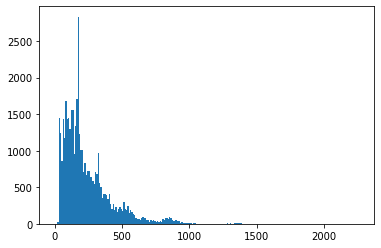

In [1161]:
bin_edges = np.arange(0, df_grouped['MonthlyLoanPayment'].max()+10, 10)
plt.hist(data = df_grouped, x ='MonthlyLoanPayment', bins = bin_edges);

The highest frequency of size of the monthly loan payments in the dataset are between a bit above zero and USD 200. 

Lets next quickly look into the distributions of the categorical variables. 

#### Categorical variables

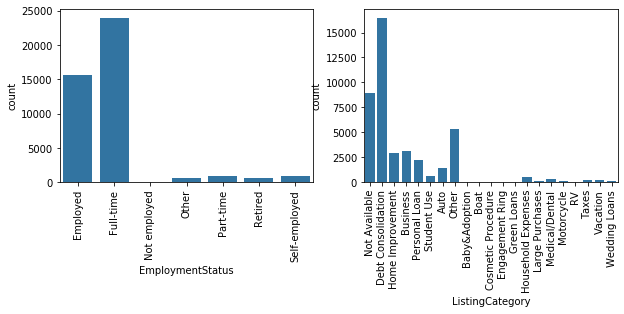

In [1162]:
# Plotting the categorical variables EmploymentStatus and Listing Category with countplot
fig = plt.figure(figsize = [10,7])# Setting the size of the plots

ax1 = fig.add_subplot(2,2,1) # 1 row, 2 cols, subplot 1
sns.countplot(data = df_grouped, x = 'EmploymentStatus', color = base_color)
plt.xticks(rotation = 90);

ax2 = fig.add_subplot(2,2,2)
sns.countplot(data = df_grouped, x = 'ListingCategory', color = base_color)
plt.xticks(rotation = 90);

The two highest employment statuses in the data are full time and employed. 
For the listing categories, DebtConsolidation is the most popular reason to take a loan, as the high frequency there is causing the rest of the attributes being flat. Lets set a ylim of 7500 that we can see more detailed distribution of the rest of the categories. 

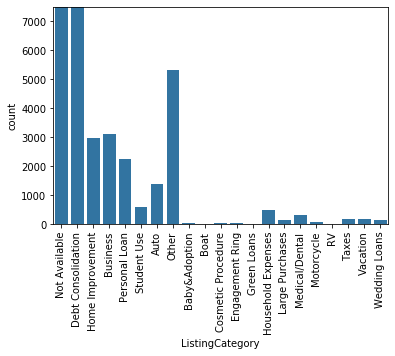

In [1163]:
sns.countplot(data = df_grouped, x = 'ListingCategory', color = base_color)
plt.ylim(0,7500)
plt.xticks(rotation = 90);

When not considering the listings where no reason is available, 'Other', Business and Home Improvement are the next 3 most popular reasons to take a loan.

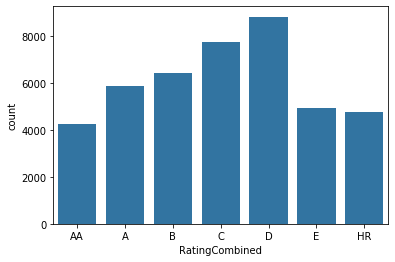

In [1164]:
# Plotting the categorical variable ratingCombined with countplot
sns.countplot(data = df_grouped, x = 'RatingCombined', color = base_color);

The biggest proportion of borrowers in the data have credit ratings D and C, and there are least number of borrowers with best and worst credit ratings. 

We have now explored the distributions of the single variates and cleaned the Before moving to exploring the data bivariately to discover the relationships between two variables, lets have a final look at the data summary after all the changes.

In [1165]:
# Checking the summary of the data
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42895 entries, 78365 to 17277
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Term                        42895 non-null  int64   
 1   LoanStatus                  42895 non-null  int32   
 2   BorrowerAPR                 42895 non-null  float64 
 3   BorrowerRate                42895 non-null  float64 
 4   ListingCategory             42895 non-null  category
 5   Occupation                  42895 non-null  category
 6   EmploymentStatus            42895 non-null  category
 7   EmploymentStatusDuration    42895 non-null  float64 
 8   CurrentCreditLines          42895 non-null  float64 
 9   OpenCreditLines             42895 non-null  float64 
 10  TotalCreditLinespast7years  42895 non-null  float64 
 11  InquiriesLast6Months        42895 non-null  float64 
 12  TotalInquiries              42895 non-null  float64 
 13  CurrentDelin

In [1166]:
# Checking the basic statistics of the data
df_grouped.describe()

Term    LoanStatus   BorrowerAPR  BorrowerRate  \
count  42895.000000  42895.000000  42895.000000  42895.000000   
mean      37.111178      0.711598      0.222311      0.199150   
std        7.844096      0.453024      0.089442      0.082333   
min       12.000000      0.000000      0.045830      0.030000   
25%       36.000000      0.000000      0.147090      0.130000   
50%       36.000000      1.000000      0.212370      0.190000   
75%       36.000000      1.000000      0.295370      0.268400   
max       60.000000      1.000000      0.423950      0.360000   

       EmploymentStatusDuration  CurrentCreditLines  OpenCreditLines  \
count              42895.000000        42895.000000     42895.000000   
mean                  82.398415            9.674671         8.415853   
std                   84.905749            5.590945         4.989465   
min                    0.000000            0.000000         0.000000   
25%                   22.000000            6.000000         5.000000   
50%                   54.000000            9.000000         8.000000   
75%                  114.000000           13.000000        11.000000   
max                  755.000000           59.000000        51.000000   

       TotalCreditLinespast7years  InquiriesLast6Months  TotalInquiries  ...  \
count                42895.000000          42895.000000    42895.000000  ...   
mean                    26.052850              1.873645        6.804220  ...   
std                     14.323723              2.814434        7.366302  ...   
min                      2.000000              0.000000        0.000000  ...   
25%                     16.000000              0.000000        2.000000  ...   
50%                     24.000000              1.000000        5.000000  ...   
75%                     34.000000              2.000000        9.000000  ...   
max                    136.000000             63.000000      158.000000  ...   

       DelinquenciesLast7Years  PublicRecordsLast10Years  \
count             42895.000000              42895.000000   
mean                  4.267980                  0.318918   
std                  10.165441                  0.753246   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   3.000000                  0.000000   
max                  99.000000                 30.000000   

       PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  \
count               42895.000000            4.289500e+04         42895.000000   
mean                    0.024408            1.549769e+04             0.536486   
std                     0.183570            3.338005e+04             0.351260   
min                     0.000000            0.000000e+00             0.000000   
25%                     0.000000            1.643000e+03             0.220000   
50%                     0.000000            6.114000e+03             0.570000   
75%                     0.000000            1.613200e+04             0.850000   
max                     7.000000            1.435667e+06             5.950000   

       AvailableBankcardCredit  DebtToIncomeRatio  StatedMonthlyIncome  \
count             42895.000000       42895.000000         42895.000000   
mean              10602.927591           0.258461          5216.788324   
std               21367.914723           0.432214          3931.169056   
min                   0.000000           0.010000             0.083333   
25%                 493.000000           0.130000          3000.000000   
50%                3133.000000           0.200000          4333.333333   
75%               11739.000000           0.310000          6368.083333   
max              572427.000000          10.010000        185081.750000   

       LoanOriginalAmount  MonthlyLoanPayment  
count        42895.000000        42895.000000  
mean          6511.644947

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the loan status, around 71% of the loans are completed and 29% are defaulted in the data. I could not see anything unusual there. 
When I looked however, into the numeric variables the Debt-To-Income Ratio (DTI) had max value of 10.01 which was extremely high. In order to see the lower values of the distribution, I set the upper xlim to 1 and smaller bin sizes (1/20) to get more detailed view of the lower values. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The LoanStatus had 12 different statuses. We are however for the purpose of this exploration, only interested of the statuses Completed, ChargedOff and Default, which were transformed to 0, and 1, completed loans and defaulted loans respectfully. 
> 
> Furhtermore, when investigating the DebtToIncome Ratio, StatedMonthlyIncome, and Borrower APR, and MonthlyLoanPayment variables, a number of outlier points were identified. 
> -	MontlyLoanPayments: There were 4108 wrongly recorded montly loan payments, that were corrected in the data using the loan payment formula.  
> 
> -	StatedMonthlyIncome: 
    - There were 99 upper outliers above 30K in the data, however there was no evidence supporting to remove these from the data as all the incomes are verified, and the borrowers were in high income occupations.
    - There were also 151 unverified incomes under 1 Dollar, and 150 of them are USD 0.083333 USD, that were removed as the > income was not verified. 
> -	Borrower APR: There were extremely low values under 0.05 in the APR distribution. The minimum APR available at Prosper is 5.99% (as per 2020, however this is subject to change slightly), and it is available only for the highest credit rating AA. Looking at the data it seems that there might have been a typing error when entering the data. To be safe, the list-ings that did not have credit rating of AA were removed from the data.
> 
> -	Debt-To-Income Ratio (DTI): There 8 were extreme DTI ratios of 0 and above 1. In order to have zero DTI, the borrower can not have any open credit lines, however all of the outliers had some. To be safe, we removed these lower_outliers from the data


After our exploration and cleaning efforts, we have a dataset that consists 42895 rows and 28 columns.  

## Bivariate Exploration

> In this section, I will investigate relationship between two variables. In order to understand the features that have an impact on the final loan status, I will plot the variables under each of the umbrella groups, against the loan status, starting from numeric variables, loan original amount & Borrower APR. 

#### Numeric variables

##### Loan original amount & Borrower interest rate

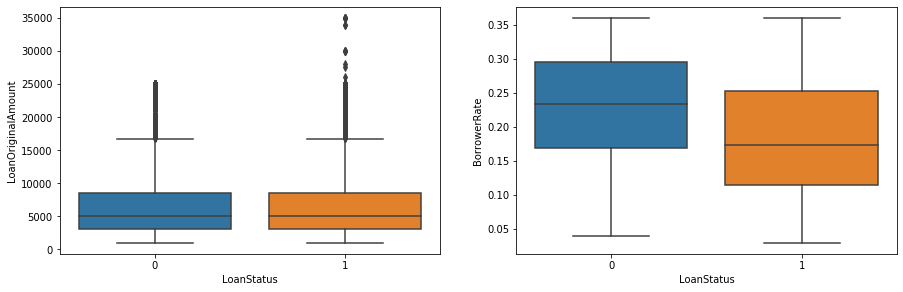

In [1167]:
# Creating boxplots for both LoanOriginalAmount and BorrowerRate
fig = plt.figure(figsize = [15, 10]) # larger figure size for subplots

ax1 = fig.add_subplot(2,2,1)
sns.boxplot(data = df_grouped, x='LoanStatus', y='LoanOriginalAmount');

ax2 = fig.add_subplot(2,2,2)
sns.boxplot(data = df_grouped, x='LoanStatus', y='BorrowerRate');

Source: [kite](https://www.kite.com/python/answers/how-to-find-the-correlation-between-two-pandas-dataframe-columns-in-python)

Although the completed loans have some outliers up to 35K in the up tail compared to defaulted loans where the highest loan amount is just above 25K, the distributions of LoanOriginalAmount at the highest frequencies are very similar for both loan statuses indicating that *there is no significant relationship between these variables.* 

In the boxplot of BorrowerRate and LoanStatus, however, the distribution of defaulted loans seem to have higher borrower rates than completed loans, indicating that there is a relationship between the variables. We will see in the later stage the distribution of the credit ratings in the data, if this will explain the higher interest rates for the defaulted loans. 

*We can therefore conclude that BorrowerAPR seems to have an impact on the outcome of the loan.* 

Now when we know the relationship between the loan value and DTI, lets explore the relationship between borrowers income and the loan status. 


#### Borrowers Income

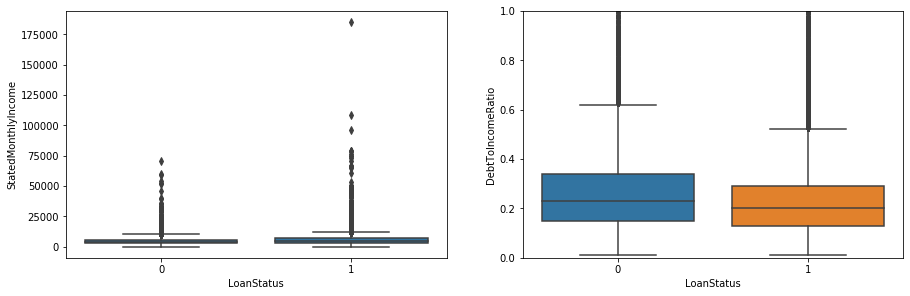

In [1169]:
# Creating a box plot for loanstatus against stated montly income, and loanstatus against DTI
fig = plt.figure(figsize = [15, 10]) # larger figure size for subplots

ax1 = fig.add_subplot(2,2,1)
sns.boxplot(data = df_grouped, x = 'LoanStatus', y = 'StatedMonthlyIncome', color = base_color);

# Plotting debt to income ratio subplot
ax1 = fig.add_subplot(2,2,2)
sns.boxplot(data = df_grouped, x='LoanStatus', y='DebtToIncomeRatio')
plt.ylim(0,1);

In [1170]:
# Checking the basic statistics of StatedMonthlyIncome
df_grouped.StatedMonthlyIncome.describe()

count     42895.000000
mean       5216.788324
std        3931.169056
min           0.083333
25%        3000.000000
50%        4333.333333
75%        6368.083333
max      185081.750000
Name: StatedMonthlyIncome, dtype: float64

Because of the outliers in the data with very high monthly income, the box shapes are flat on the bottom at around 0. What is interesting is that the completed loans have much greater range in income, with extreme values up to 175K, where defaulted loans highest values are at 75K.

In order to see the distribution of the lower income values in the dataset which have the highest frequency, I will set the ylim upper limit to 10000. As 75th percentile is at 6368 so it is safe to set the limit at 10000.

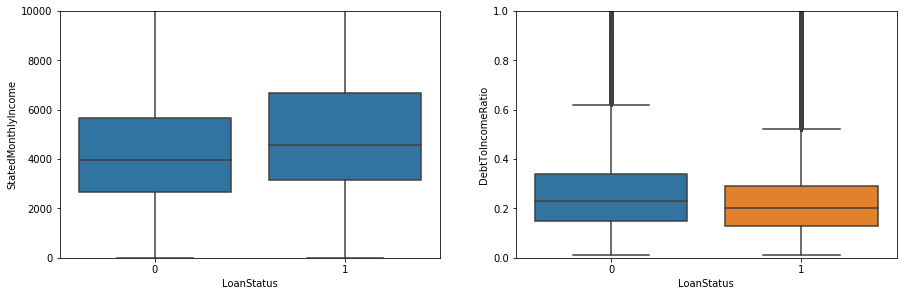

In [1171]:
# Re-creating the plot with ylim at 10K to filter out the outliers. 
# 75th percentile is at 6250K so it is safe to set the limit at 10K
fig = plt.figure(figsize = [15, 10]) # larger figure size for subplots

ax1 = fig.add_subplot(2,2,1)
sns.boxplot(data = df_grouped, x = 'LoanStatus', y = 'StatedMonthlyIncome', color = base_color)
plt.ylim(0,10000);

# Plotting debt to income ratio subplot
ax1 = fig.add_subplot(2,2,2)
sns.boxplot(data = df_grouped, x='LoanStatus', y='DebtToIncomeRatio')
plt.ylim(0,1);

In [1172]:
# Getting the correlation coefficient for the variable pair 
corr_income = df_grouped['StatedMonthlyIncome'].corr(df_grouped['LoanStatus'])

print("The correlation coefficient between stated montly income and the loan status is", corr_income)

The correlation coefficient between stated montly income and the loan status is 0.09013249270820967


The boxplot shows that the borrowers in the completed loans group have slightly higher median income at little above 4000$ compared to borrowers of defaulted loans where the median is around USD 4000. 50 percent of the defaulted loans borrowers have monthly income between USD 2500 and a little under USD 6000, while 50 percent of the borrowers whose loans were completed have monthly income between USD 3000 and little under USD 7000.

Because DTI is derived from borrowers income, as expected, DTI also seems to have relationship with loan status.

*As conclusion we can say that both StatedMonthlyIncome and DebtToIncomeRatio have impact on the outcome of the loan.* 

Let's now go ahead and investigate the relationship between the employment status duration and the loan status. 


#### Employment status (duration)

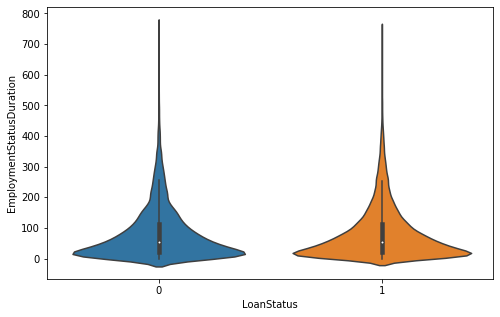

In [1173]:
# Creating a violinplot against loanstatus and employmentStatusDuration
fig = plt.figure(figsize = [8, 5]) # larger figure size for subplots
sns.violinplot(data = df_grouped, x='LoanStatus', y='EmploymentStatusDuration');

*The distributions of the employment status duration for both loan status groups look very similar and the corr coeff is very weak 0.006, indicating that there is no significant relationship between these variables, and therefore employment duration does not have impact on the outcome of the loan status.*

Next lets move to explore the relationship between the liabilities and the loan status in the data. 

#### Liabilities

(0, 10)

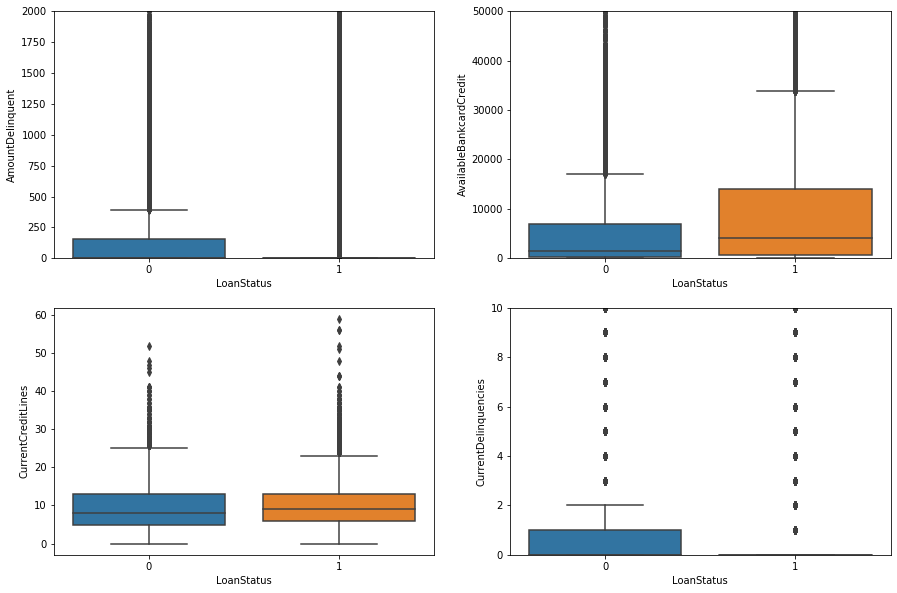

In [1175]:
# Creating boxplot subplots of loanstatus and AmountDelinquent, AvailableBankcardCredit, CurrentCreditLines and CurrentDelinquencies
fig = plt.figure(figsize = [15, 10]) # larger figure size for subplots

ax1 = fig.add_subplot(2,2,1)
sns.boxplot(data = df_grouped, x='LoanStatus', y='AmountDelinquent')
plt.ylim(0,2000);

ax2 = fig.add_subplot(2,2,2)
sns.boxplot(data = df_grouped, x='LoanStatus', y='AvailableBankcardCredit')
plt.ylim(0,50000);

ax3 = fig.add_subplot(2,2,3)
sns.boxplot(data = df_grouped, x='LoanStatus', y='CurrentCreditLines');

ax4 = fig.add_subplot(2,2,4)
sns.boxplot(data = df_grouped, x='LoanStatus', y='CurrentDelinquencies')
plt.ylim(0,10)


In terms of liabilities, borrowers of defaulted loans seem to have higher current delinquencies, higher amount of deliquencies in dollars, and less available bank credit than borrowers of completed loans. The Current credit lines do not have notable differences in their distributions. *We can therefore say that CurrentDelinquencies, AvailableBankcardCredit, and AmountDelinquent have impact on the outcome of the loan.* Before moving to the categorical variables in the umbrella groups, lets still look at the credit history. 

#### Credit history

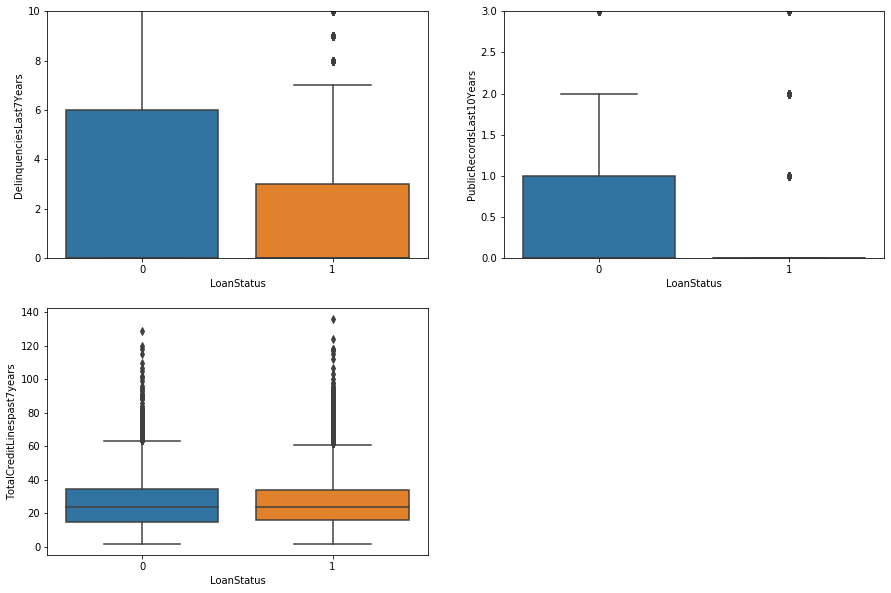

In [1177]:
fig = plt.figure(figsize = [15, 10]) # larger figure size for subplots

ax1 = fig.add_subplot(2,2,1)
sns.boxplot(data = df_grouped, x='LoanStatus', y='DelinquenciesLast7Years')
plt.ylim(0,10);

ax2 = fig.add_subplot(2,2,2)
sns.boxplot(data = df_grouped, x='LoanStatus', y='PublicRecordsLast10Years')
plt.ylim(0,3);

ax3 = fig.add_subplot(2,2,3)
sns.boxplot(data = df_grouped, x='LoanStatus', y='TotalCreditLinespast7years');

Similarly to liabilities, the delinquencies last 7 years, and public records last 10 have relationships with the loan outcome. *Borrowers of defaulted loans have significantly more historic delinquencies and public records than borrowers with completed loans.*
Total credit lines past 7 years, does not seem to have any significant differences in the data. 

Now we move to the categorical variables starting with the credit rating, variable called RatingCombined. 

#### Categorical variables

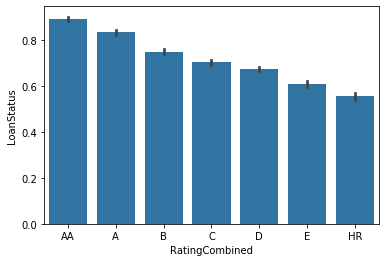

In [1178]:
# Creating a barplot against RatingCombined and loanStatus
sns.barplot(data = df_grouped, x = 'RatingCombined', y='LoanStatus', color = base_color);

Source: [Kaggle](https://www.kaggle.com/jschnessl/prosper-analysis)

As expected, we can clearly see that there is a relationship between the RatingCombined and the loan status. Loans with the worst credit rating HR are failing 44% of the time, while loans with good credit rating AA only fail 11% of the time. 

Lets see now the relationship between the employement status and loan status.

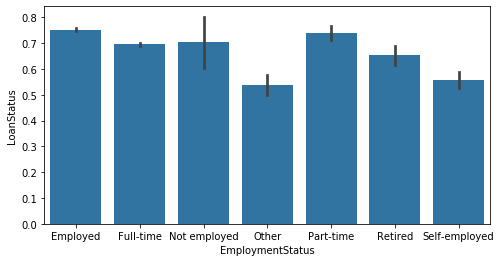

In [1180]:
# Creating a barplot against employment status and occupation. 
fig = plt.figure(figsize = [8, 4])
sns.barplot(data = df_grouped, x = 'EmploymentStatus', y='LoanStatus', color = base_color);

Similarly, it seems that there are some relationships between the employment status and the loan status. The loans from borrowers that are employed are failing 24% of the time while borrowers have stated their employement status as 'other' fail 46% of the time. However, as the populations for each categories were so unequally distributed; most of the borrowers were employed or full time, and we can not really distinguish the difference between these categories; I find the statistical significance for this variable questionable.

Lets still see the relationship between the Listing category and loan status.

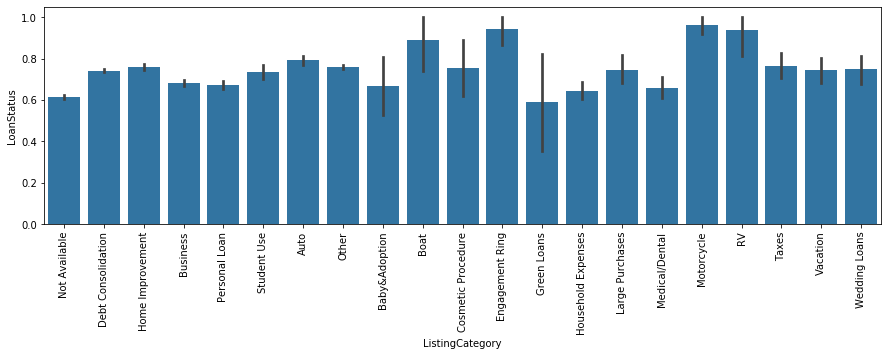

In [1182]:
# Creating a barplot against ListingCategory and LoanStatus. 
fig = plt.figure(figsize = [15, 4])
sns.barplot(data = df_grouped, x = 'ListingCategory', y='LoanStatus', color = base_color)
plt.xticks(rotation = 90);

Once again, it seems thare is a somekind of relationship between the ListingCategory and the loan status. The loans for purchasing a motorcycle are failing only around 3.6% of the time while green loans seem to fail around 41.2% of the time. However, as the populations for each categories were so unequally distributed, I find the statistical significance also for this variable questionable.

Before closing this section, lets still check how are the predictive numeric variables we are most interested of correlating with each other. 

In [1184]:
# Storing the numeric variables under numeric_vars
numeric_vars = ['StatedMonthlyIncome', 'BorrowerRate', 'LoanOriginalAmount', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'AmountDelinquent', 'AvailableBankcardCredit', 'BankcardUtilization', 'CurrentCreditLines', 'CurrentDelinquencies', 'DelinquenciesLast7Years', 'TotalInquiries', 'PublicRecordsLast10Years']

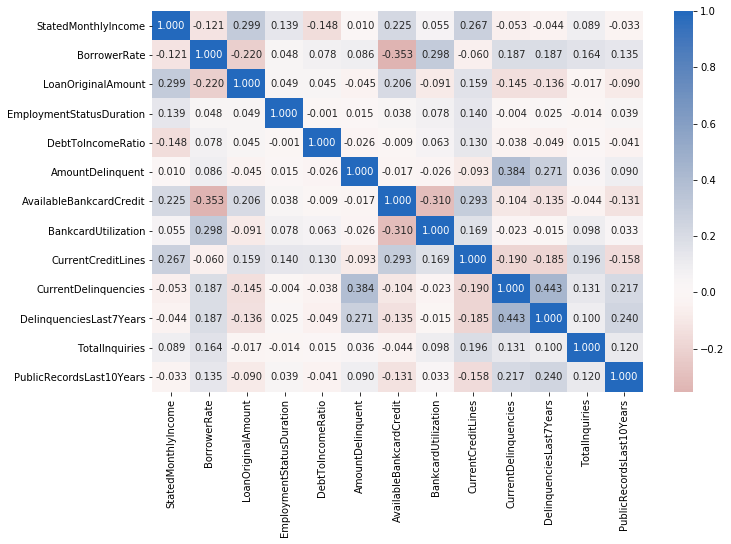

In [1185]:
# creating a heatmap correlation plot for numeric variables
plt.figure(figsize = [11, 7])
sns.heatmap(df_grouped[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Source: [Udacity, Example_Project_Diamonds]

The strenghts of the relationships between the numeric predictor variables are altogether suprisingly weak. The strongest relationships between variables can be found between the delinquencies. For example CurrentDelinquencies and DelinquenciesLast7Years have a correlation coefficient of 0.443, which is a positive moderate linear relationship meaning that when other variable increases, we can expect the other one to increase too, and vice verca. 

The strongest negative linear relationship we can see between the BorrowerRate and the AvailableBankcardCredit, with moderate correlation of -0.353. This means that as the BorrowerRate increases the AvailableBankCredits decrease, and vice verca. This is expected as the borrower rates generally increase as the borrowers liabilities increase. 

As expected, the StatedMonthlyIncome has negative relationship with the BorrowerRate, however the correlation is interestingly low, -0.121, meaning that the there is low likelihood of one being dependent of the other. Furthermore, the StatedMonthlyIncome, and DebtToIncome Ratio, weak negative relatiohship of -0.148, indicating that monthly income does not seem to have a significant impact on the DTI. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this section I investigated the relationship between a predictor variable; previously grouped on their characteristics to liabilities, features of the loan, borrowers income, employment status, credit rating, and credit history; and the dependent variable loan status. 

The combined credit score variable 'RatingCombined' was as expected very powerful to predict the outcome of the loan. The worse the credit rating, the higher chance the loan to default, and vice verca.

Unsurprisingly as linked to the credit score, the borrowers current and historical liabilities had strong relationship with the loan status. The number of delinquencies during past 7 years, and public records during past 10 years had strong relationships with the loan outcome, the borrowers with delinquencies or public records were more likely to default than borrowers with no delinquencies or public records, both currently and historically. 

I also created a boxplot to compare the BorrowerRates in the two Loan Status groups and discovered that the interest rates are higher for borrowers whose loans defaulted.  


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The strenghts of the relationships between the numeric predictor variables were altogether suprisingly weak. The strongest relationships between variables were found in moderate level between the delinquencies.

So far we know that the following variables have impact on the outcome of the loan: 
- Credit rating (RatingCombined)
- Current and historical liabilities
- DebtToIncomeRatio
- Interest rate (BorrowerRate and APR, but APR is just another form of interest rate, interest + fees, we are only looking at BorrowerRate)
- StatedMonthlyIncome

Lets see how these variables play together in the next, and last section of this data exploration. 

## Multivariate Exploration

The main thing I want to explore in this section is the relationship between two categorical variables loan status and rating combined (credit rating), and current and historical liabilities, debt to income ratio, interest rate and monthly income.

C:\Users\Terhi\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


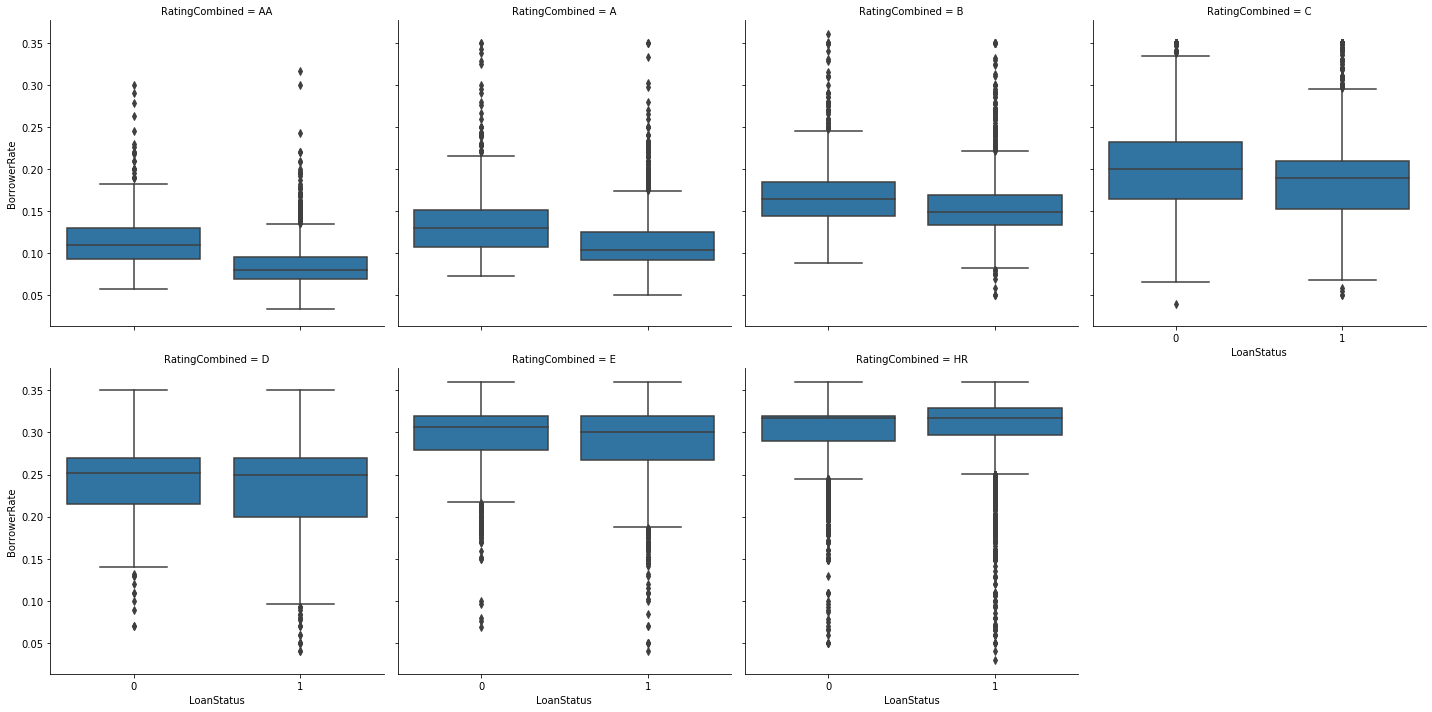

In [1186]:
# faceting bivariate plots to create a multivariate boxplots 
g = sns.FacetGrid(data = df_grouped, col = 'RatingCombined', height = 5, col_wrap=4, margin_titles = True)
g.map(sns.boxplot, 'LoanStatus', 'BorrowerRate');

This series of plots clearly represents how the BorrowerRate increases as the credit rating gets worse. Interestingly we can also see that defaulted loans have higher interest rate in the higher credit ratings, up to C, but when the credit rating gets to worse level D,E,HR the height of the interest rates between the two loan statuses become less clear, and in fact, borrowers whose loan was completed with credit rating HR, had a bit higher range of interest rates compared to defaulted loans. 

Lets see if we have similar effect with the debt to income ratio when plotted against the credit rating and status of the loan. 

C:\Users\Terhi\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


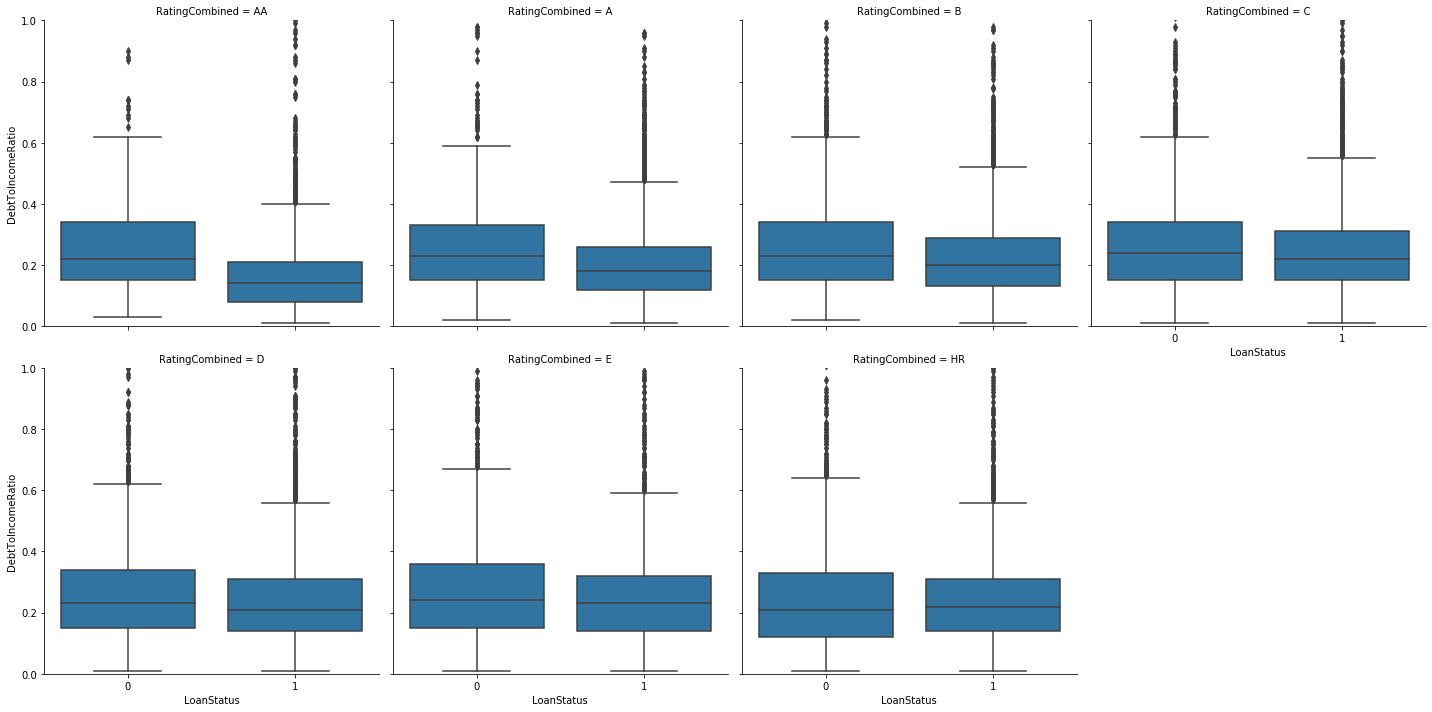

In [1187]:
# faceting bivariate plots to create a multivariate boxplots 
g = sns.FacetGrid(data = df_grouped, col = 'RatingCombined', height = 5, col_wrap=4, margin_titles = True, ylim=[0,1])
g.map(sns.boxplot, 'LoanStatus', 'DebtToIncomeRatio');

DebtToIncomeRatio does not seem to differ between the different credit rating groups. This also indicates to me that debt to income ratio does not seem to be that efficient predictor for the loan status. 

Next as the DTI does not play such a great role in the level of credit rating, lets see what is the credit rating's connection with borrowers income and loan status. 

C:\Users\Terhi\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


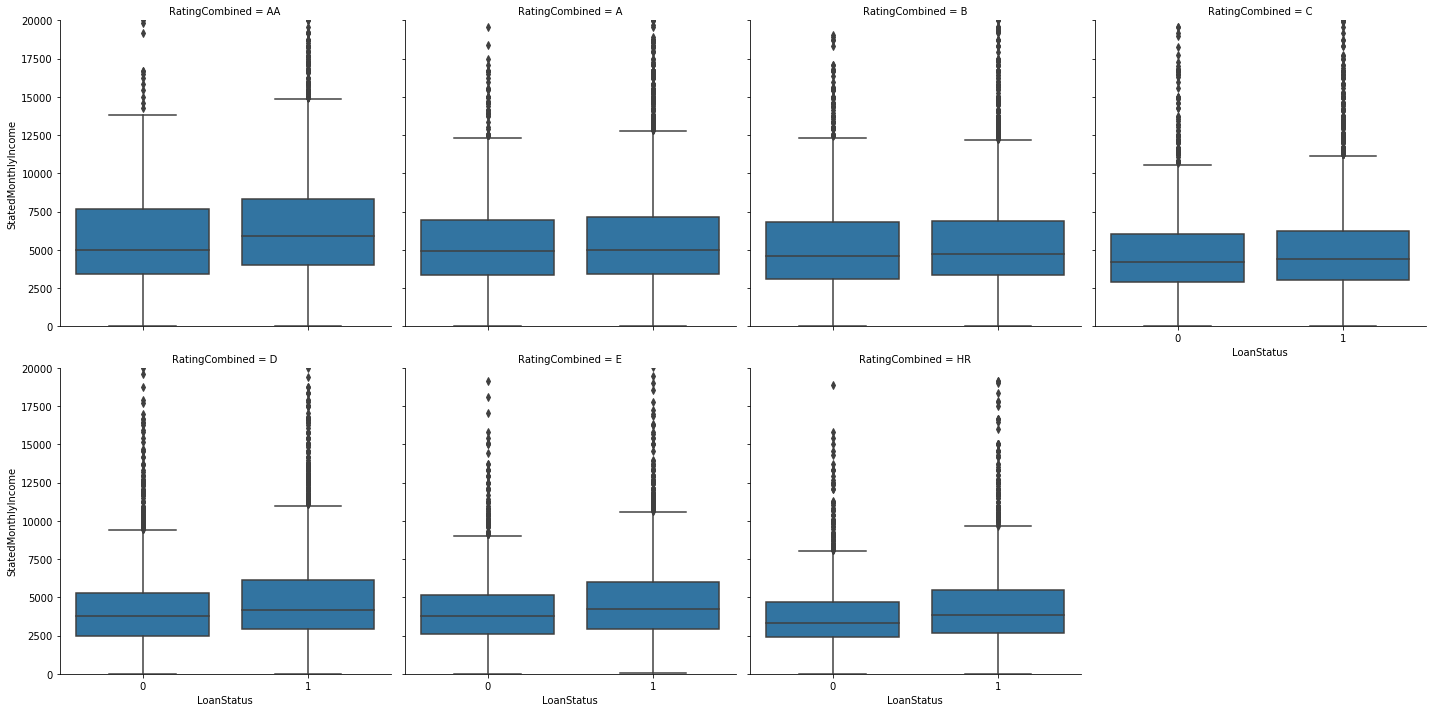

In [1188]:
# faceting bivariate plots to create a multivariate boxplots 
g = sns.FacetGrid(data = df_grouped, col = 'RatingCombined', height = 5, col_wrap=4, margin_titles = True, ylim=[0,20000])
g.map(sns.boxplot, 'LoanStatus', 'StatedMonthlyIncome');

Looking at the stated monthly income and its relationship between the credit rating and the loan status, it seems that the monthly income decreases as the credit rating gets worse. We can also see that the borrowers whose loan defaulted have lower income levels than the borrowers whose loans were completed. 

Finally, lets still look into the delinquencies' role in credit rating and loan status both for current and historical delinquencies. 

C:\Users\Terhi\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


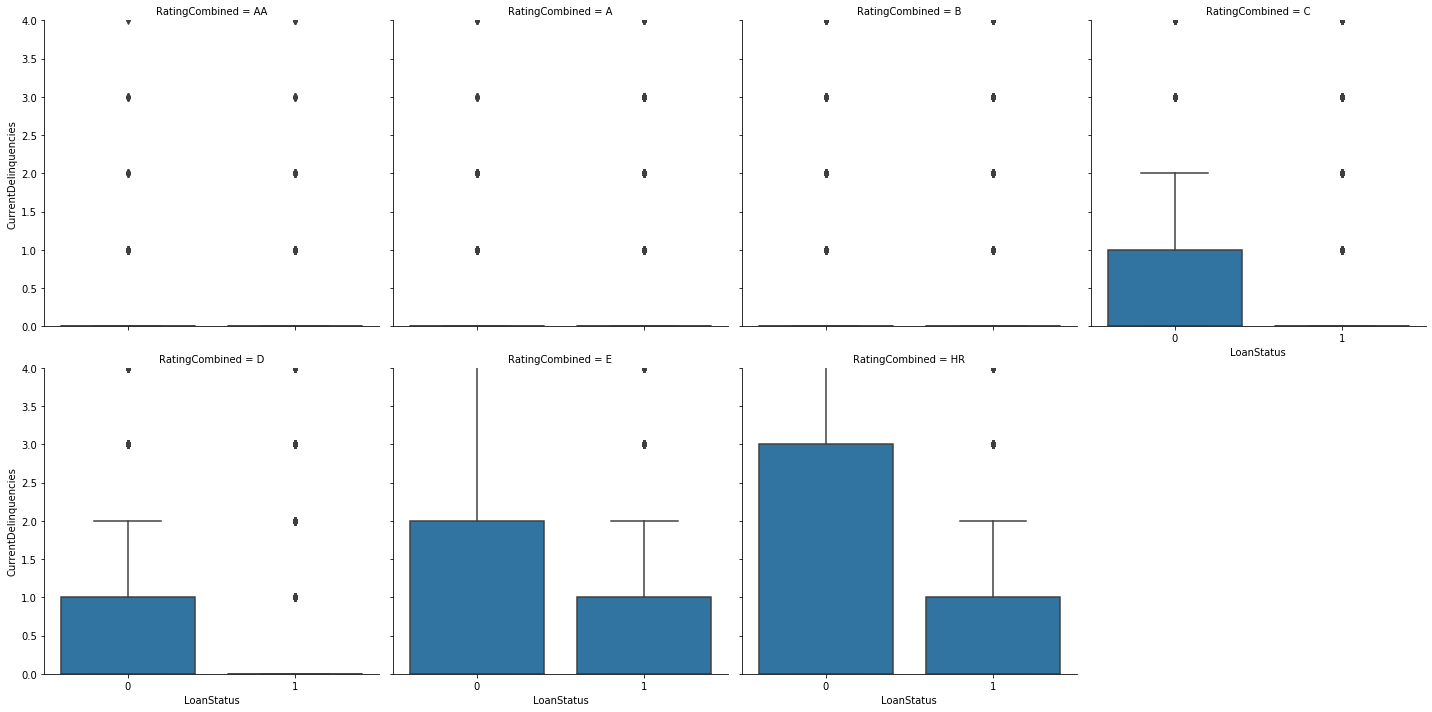

In [1189]:
# faceting bivariate plots to create a multivariate boxplots 
g = sns.FacetGrid(data = df_grouped, col = 'RatingCombined', height = 5, col_wrap=4, margin_titles = True, ylim=[0,4])
g.map(sns.boxplot, 'LoanStatus', 'CurrentDelinquencies');

This plot reveals that borrowers whose loans were completed had almost no delinquencies up to credit rating of level D, and in level E around twice less, and level HR almost thrice less delinquencies than defaulted loans. 

The borrowers whose loans were defaulted on the other hand had almost no delinquencies up to credit rating B, and from there on delinquencies increasing as the credit rate gets worse. 

C:\Users\Terhi\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


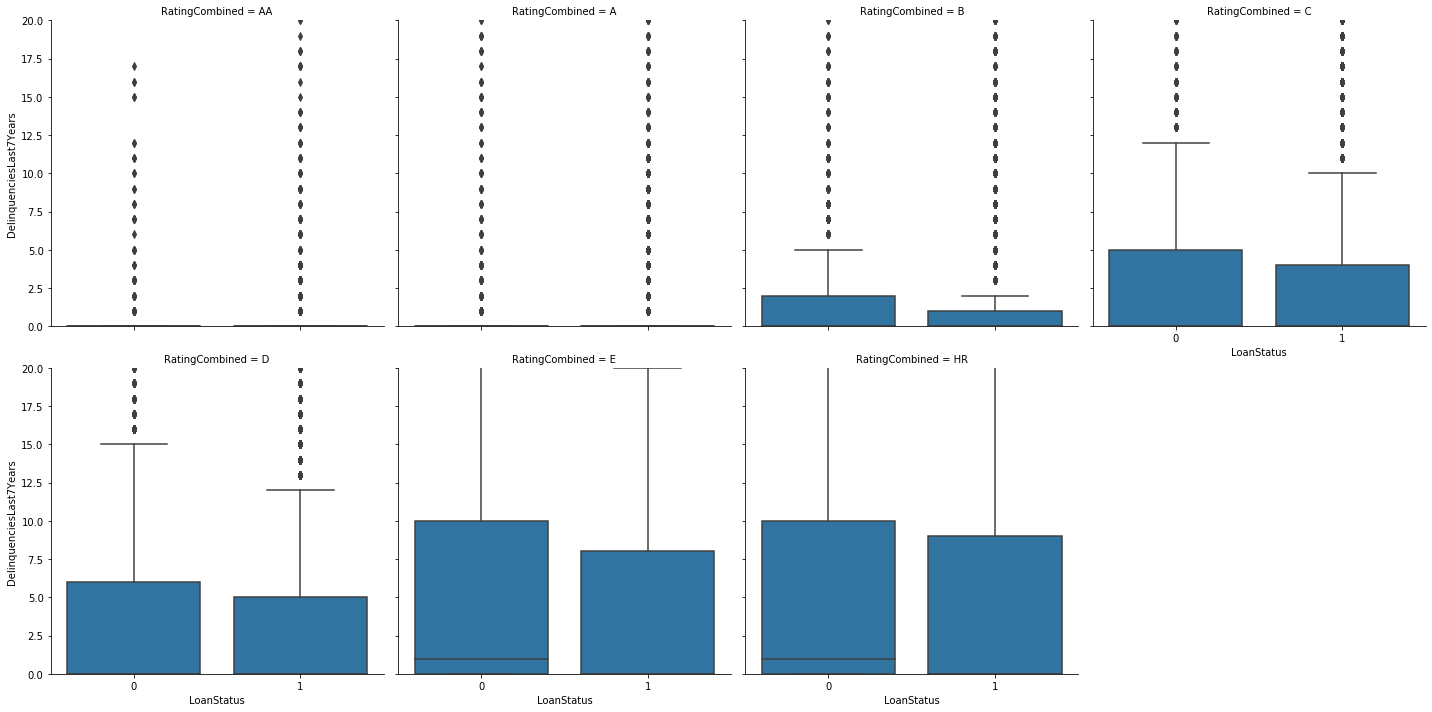

In [1190]:
# faceting bivariate plots to create a multivariate boxplots 
g = sns.FacetGrid(data = df_grouped, col = 'RatingCombined', height = 5, col_wrap=4, margin_titles = True, ylim=[0,20])
g.map(sns.boxplot, 'LoanStatus', 'DelinquenciesLast7Years');

In this series of plots we can see that borrowers with credit rating AA and A had no historical delinquencies in both loan statuses, and that the delinquencies are increasing for both completed and defaulted loans in stable manner from credit rating B to credit rating HR. Defaulted loans have in each credit rating group from B to HR higher amount of delinquencies than completed loans.  

As the borrowers with credit rating B have historical delinquencies, this could indicate that historical delinquencies have little less significance to the credit rate given to the borrower, however this we would need to study further in another exploration. 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the boxplot of BorrowerRate, RatingCombined, and LoanStatus we could clearly see the connection between the interest rate and the credit rating. We could see that as the credit rating decreased the interest rate increased. We could also see that up to credit rating C the defaulted loans had higher interest rates than completed loans, but at lower credit levels the differences became less obvious.  

Also the relationship between stated monthly income, credit rating and loan status, we could see that monthly income decreased as the credit rating got worse. We could also see that the borrowers whose loans defaulted had lower income levels than the borrowers whose loans were completed.

Current delinquencies plotted against credit rating and loan status, showed that borrowers with completed loans had almost no delinquencies up to credit rating of level D, and in level E around twice less, and level HR almost thrice less delinquencies than defaulted loans.

Delinquencies from last 7 years plotted against credit rating and loan status on the other hand illustrated that borrowers with credit rating AA and A had no historical delinquencies in both loan statuses, and that the delinquencies increased for both loan status groupes in stable manner from credit rating B to credit rating HR, defaulted loans having higher numbers of delinquencies than completed loans.


### Were there any interesting or surprising interactions between features?

It was suprising to me that when DebtToIncomeRatio was plotted against credit rating and loan status, the DTI did not seem to differ between different credit rating groups.